#Understanding the frequency composition of different chord structures

Required Packages:

In [ ]:
install.packages("tuneR")
install.packages("tswge")
library(readr)
library(tuneR)
library("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘signal’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘PolynomF’, ‘waveslim’, ‘astsa’




##Introduction

Music theory is the vast and ever-evolving foundation of knowledge utilized to compose, perform and analyze music. Utilizing music theory we can analyze music at different levels of abstraction. Certain analytical frameworks within music theory lend themselves more easily to quantitative methods than others. For example, when talking about the timbre of someone's voice, one would typically make qualitative observations. Is there voice raspy and growling or is it soft and airy? On the other hand, if we are talking about the pitch of someone's voice, it is easier to make quantitative observations, such as the frequency in Hz at which their vocal cords vibrate. One analytical framework that tries to relate quantitative observations with the qualitative experience of music is the study of Harmony. 
 
When you play an instrument, you force some object to vibrate. This vibration has a specific frequency, amplitude and duration, and we call it a note. Notes form the fundamental building blocks of Harmony. Harmony occurs when two or more notes at different frequencies are played simultaneously (Music Theory Academy). We call the sound of multiple notes playing simultaneously a chord. The study of harmony involves studying chords and the relationships between the frequencies of the individual notes comprising them. Different combinations of frequencies can elicit different emotional responses from a listener. By analyzing harmony, we can understand how frequency relationships translate into different emotional responses.




##Data

To create the data required for this analysis I loaded up a software synthesizer (3x Osc) with a simple sine-wave preset in Fl Studio (a digital audio workspace). With this synthesizer I recorded 4 wave files. The first wave file contained one note being played, a C. The second wave file contained 2 notes being played simultaneously, C and G, which forms a C Power Chord. The third file contained three notes being played simultaneously, C, E and G, which forms a C Major Chord. The last file also contained three notes being played simultaneously, C, D# and G, which forms a C Minor Chord. 

In [ ]:
#Loading audio clips
c_single_note <- readWave("/content/c.wav")
c_power_chord <- readWave("/content/cpower.wav")
c_major <- readWave("/content/cmajor.wav")
c_minor <- readWave("/content/cminor.wav")

In [ ]:
#Quick look at data
str(c_single_note)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:75797] 0 668 1332 1992 2637 3268 3884 4475 5045 5583 ...
  ..@ right    : num(0) 
  ..@ stereo   : logi FALSE
  ..@ samp.rate: int 44100
  ..@ bit      : int 16
  ..@ pcm      : logi TRUE


We can see from the above output that our audio file has one channel (mono) and 75,797 samples. With a sample rate of 44,100 we can determine the length of our audio clip to be about 1.7sec.

##Analysis

###Single Note

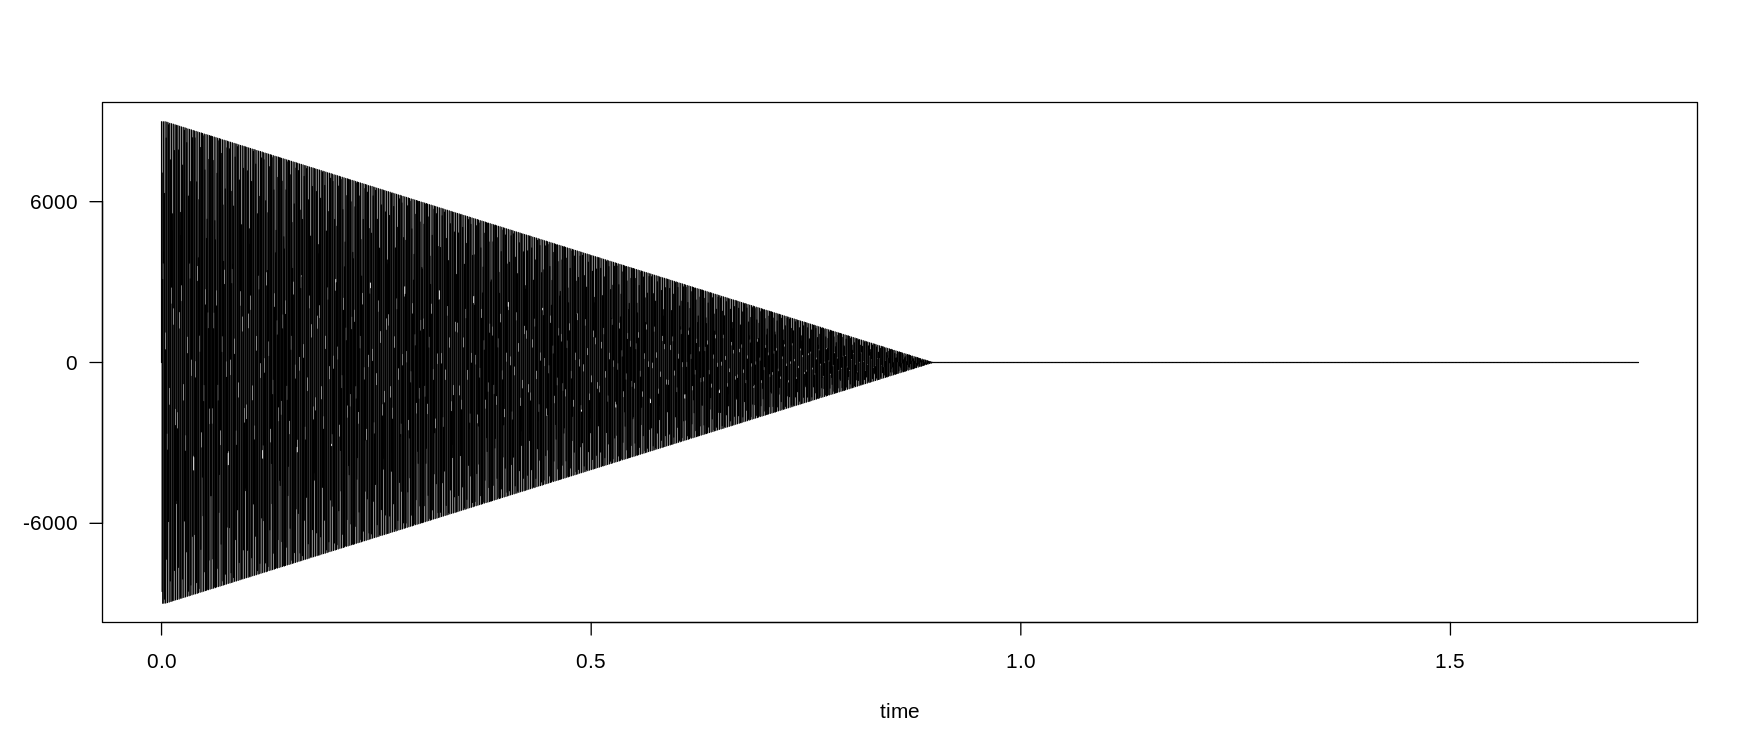

In [ ]:
#Plot Wave
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(c_single_note)

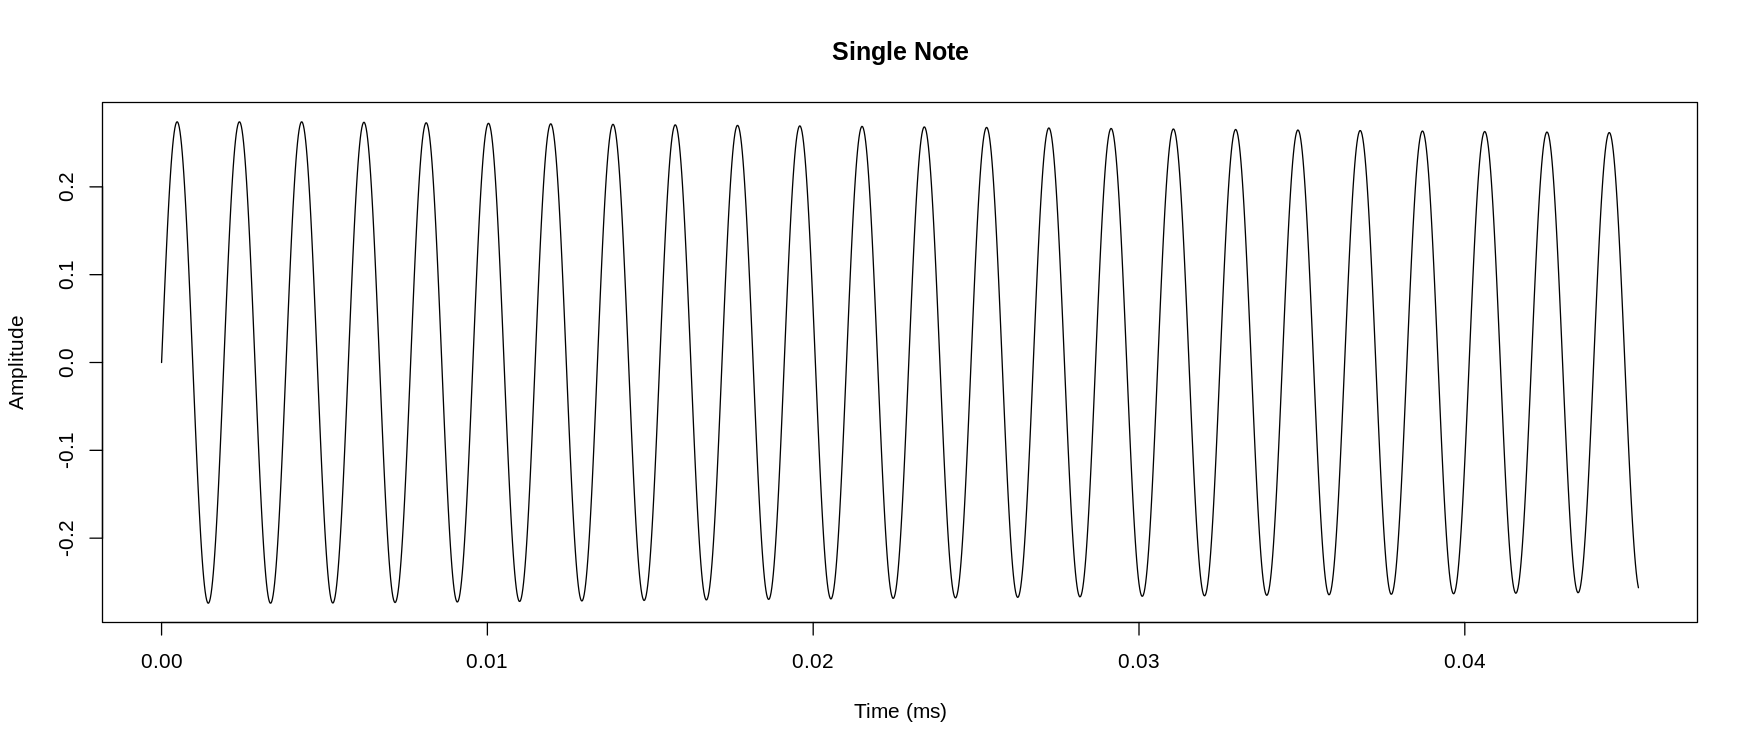

In [ ]:
#Normalize Amplitudes
c_time <- (0:(length(c_single_note@left) - 1)) / c_single_note@samp.rate
c_adjusted <- c_single_note@left / 2^(c_single_note@bit - 1)

#Extract clip
c_snippet_time <- c_time[1:2000]
c_snippet <- c_adjusted[1:2000]

plot(c_snippet_time, c_snippet, type = 'l', col='black', xlab='Time (ms)', ylab='Amplitude', main = "Single Note")

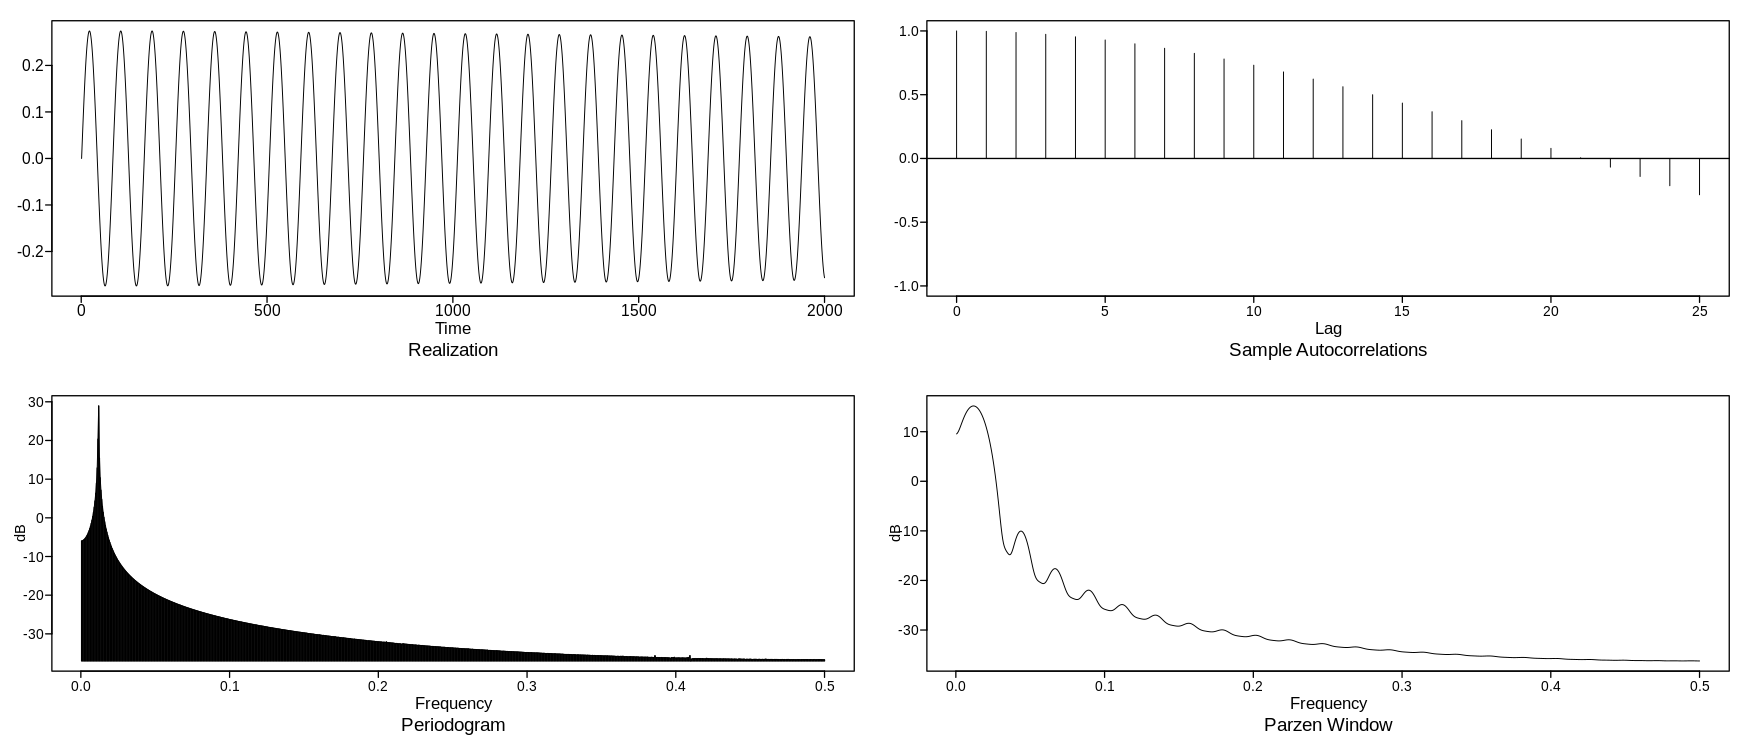

In [ ]:
plot <- plotts.sample.wge(c_snippet)

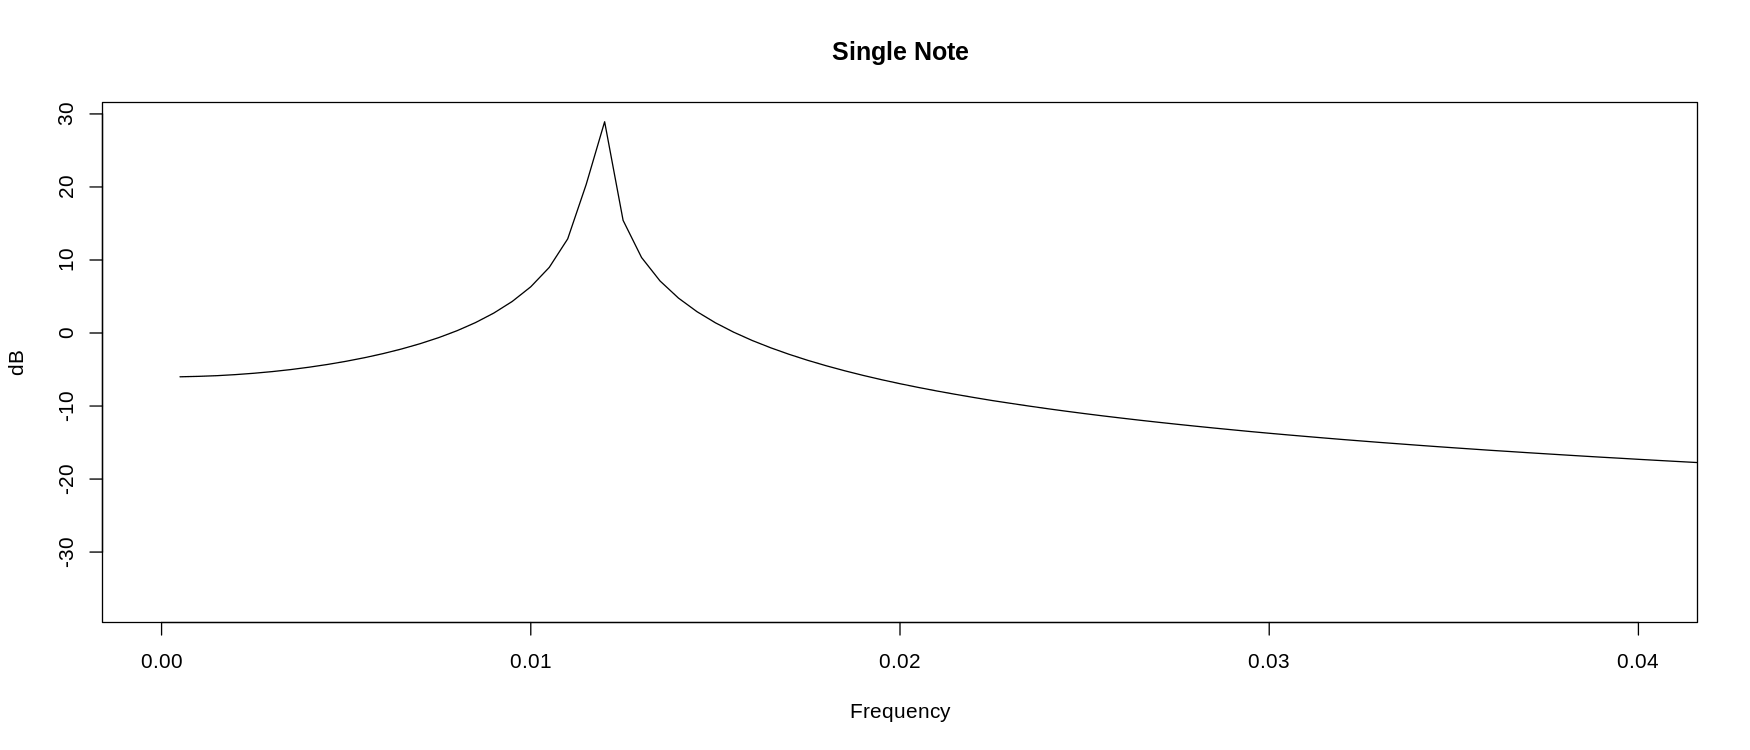

In [ ]:
plot(plot$freq, plot$db, type = 'l', xlim = c(0, 0.04), xlab = "Frequency", ylab = "dB", main = "Single Note")

###Power Chord

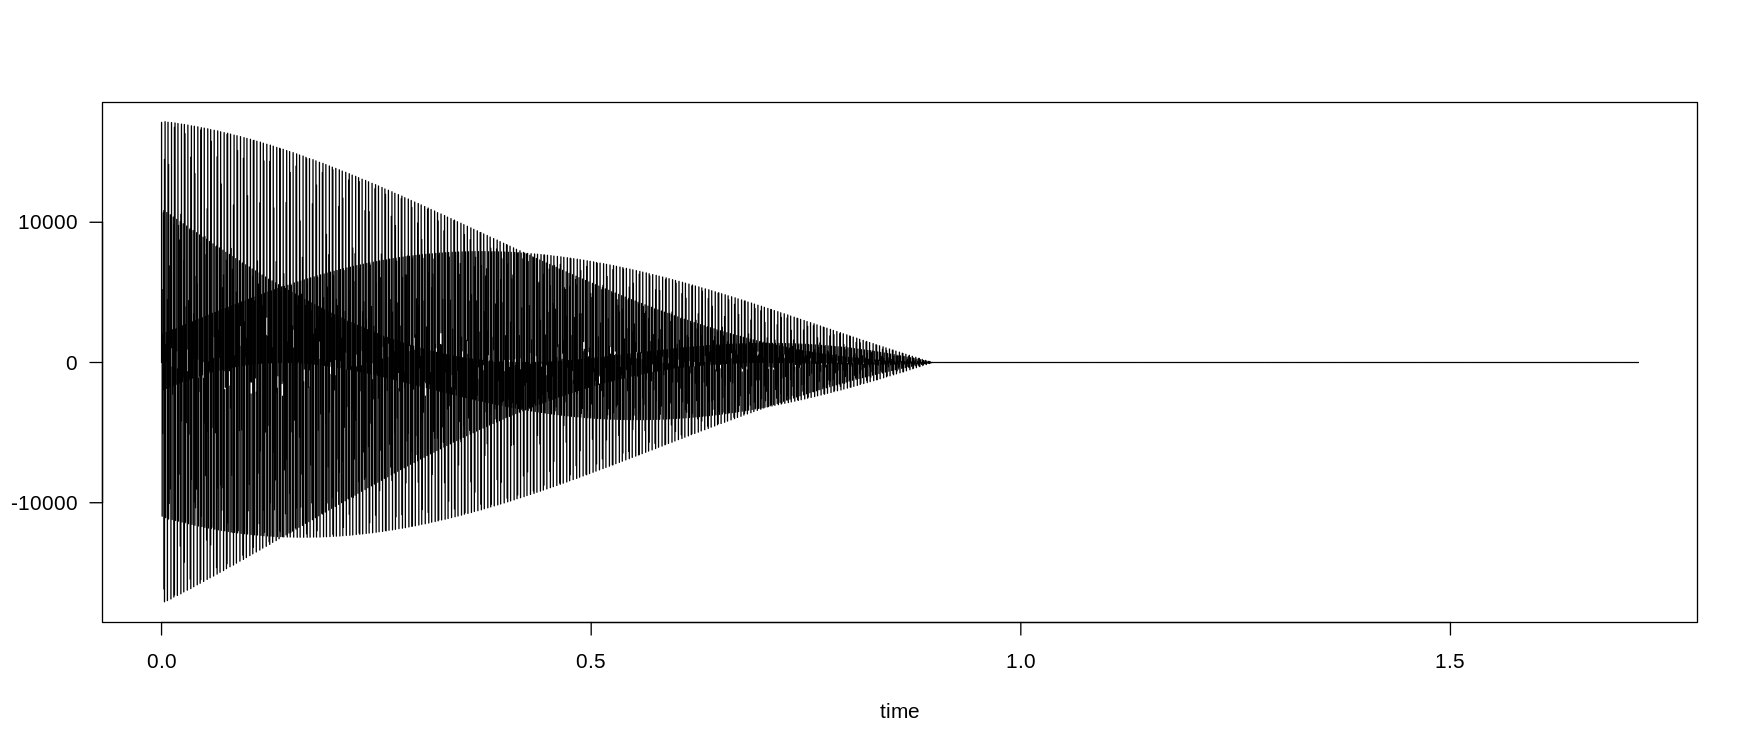

In [ ]:
#Plot Wave
plot(c_power_chord)

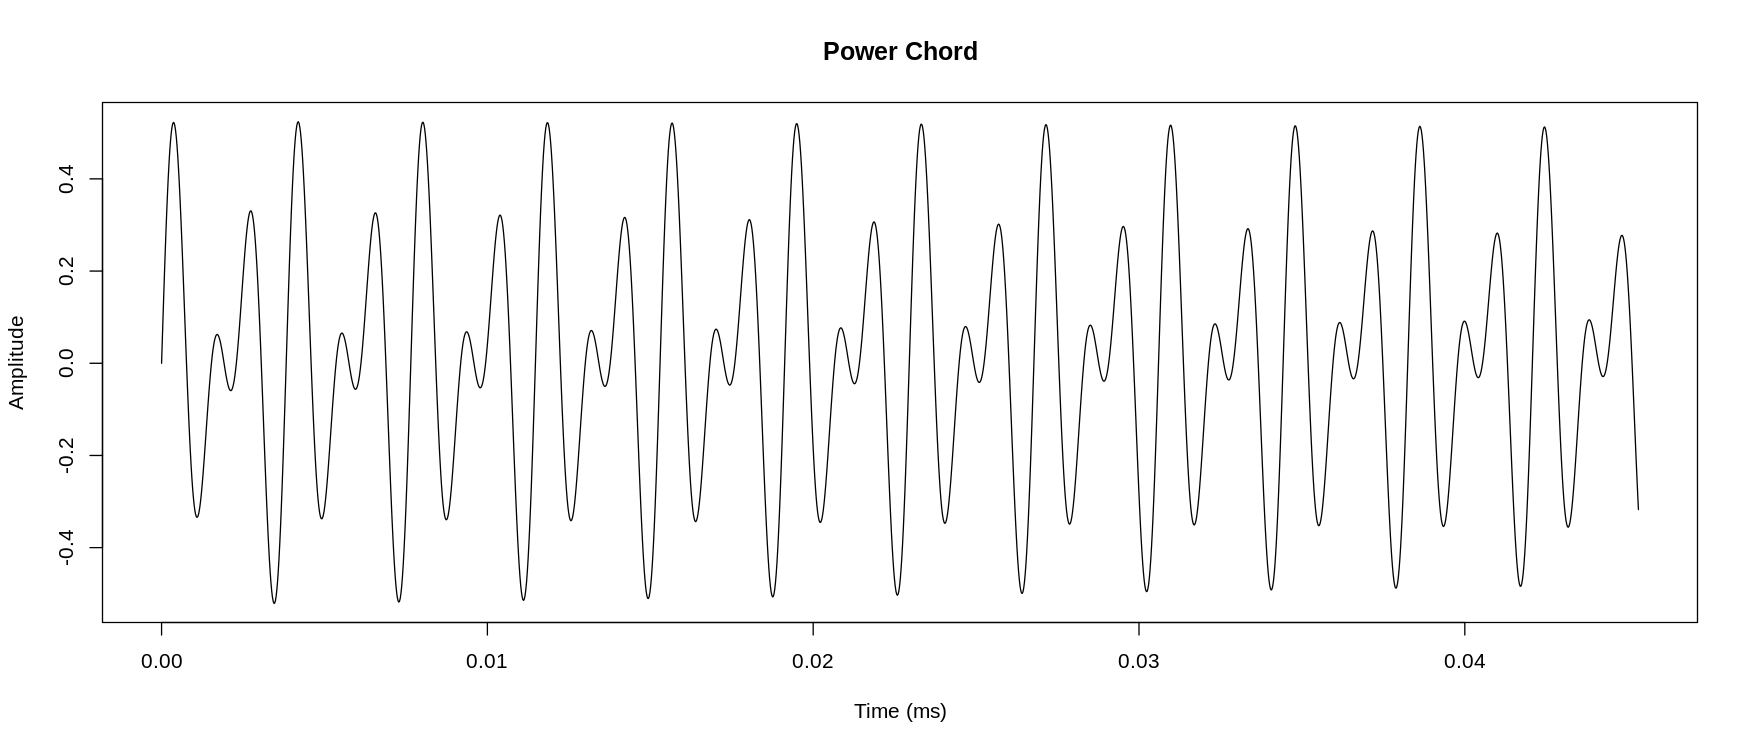

In [ ]:
#Normalize Amplitudes
c_power_time <- (0:(length(c_power_chord@left) - 1)) / c_power_chord@samp.rate
c_power_adjusted <- c_power_chord@left / 2^(c_power_chord@bit - 1)

#Extract clip
c_power_snippet_time <- c_power_time[1:2000]
c_power_snippet <- c_power_adjusted[1:2000]

plot(c_power_snippet_time, c_power_snippet, type = 'l', col='black', xlab='Time (ms)', ylab='Amplitude', main = "Power Chord")

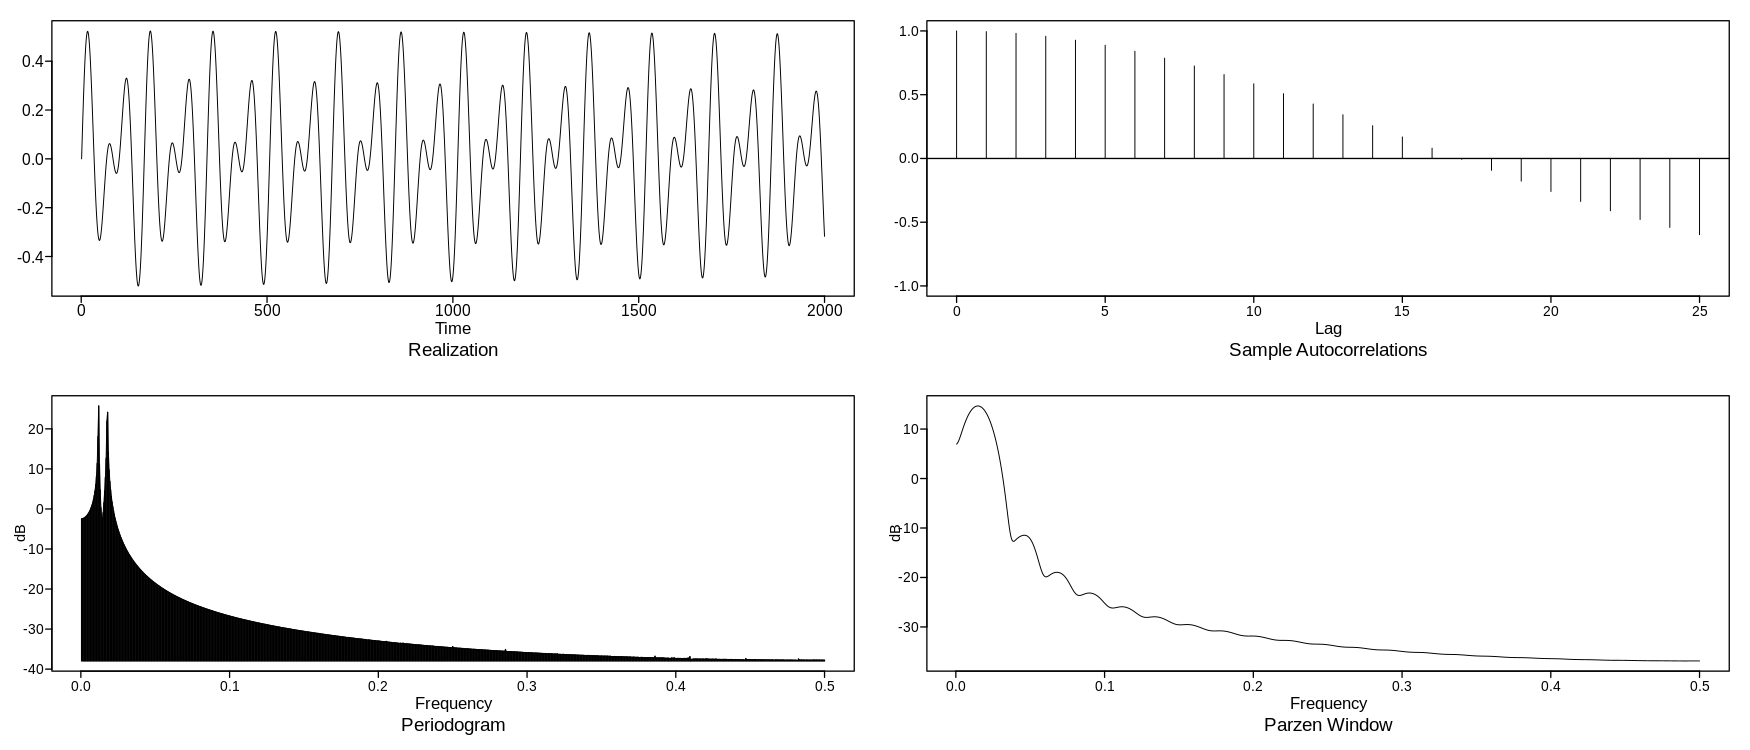

In [ ]:
plot1 <- plotts.sample.wge(c_power_snippet)

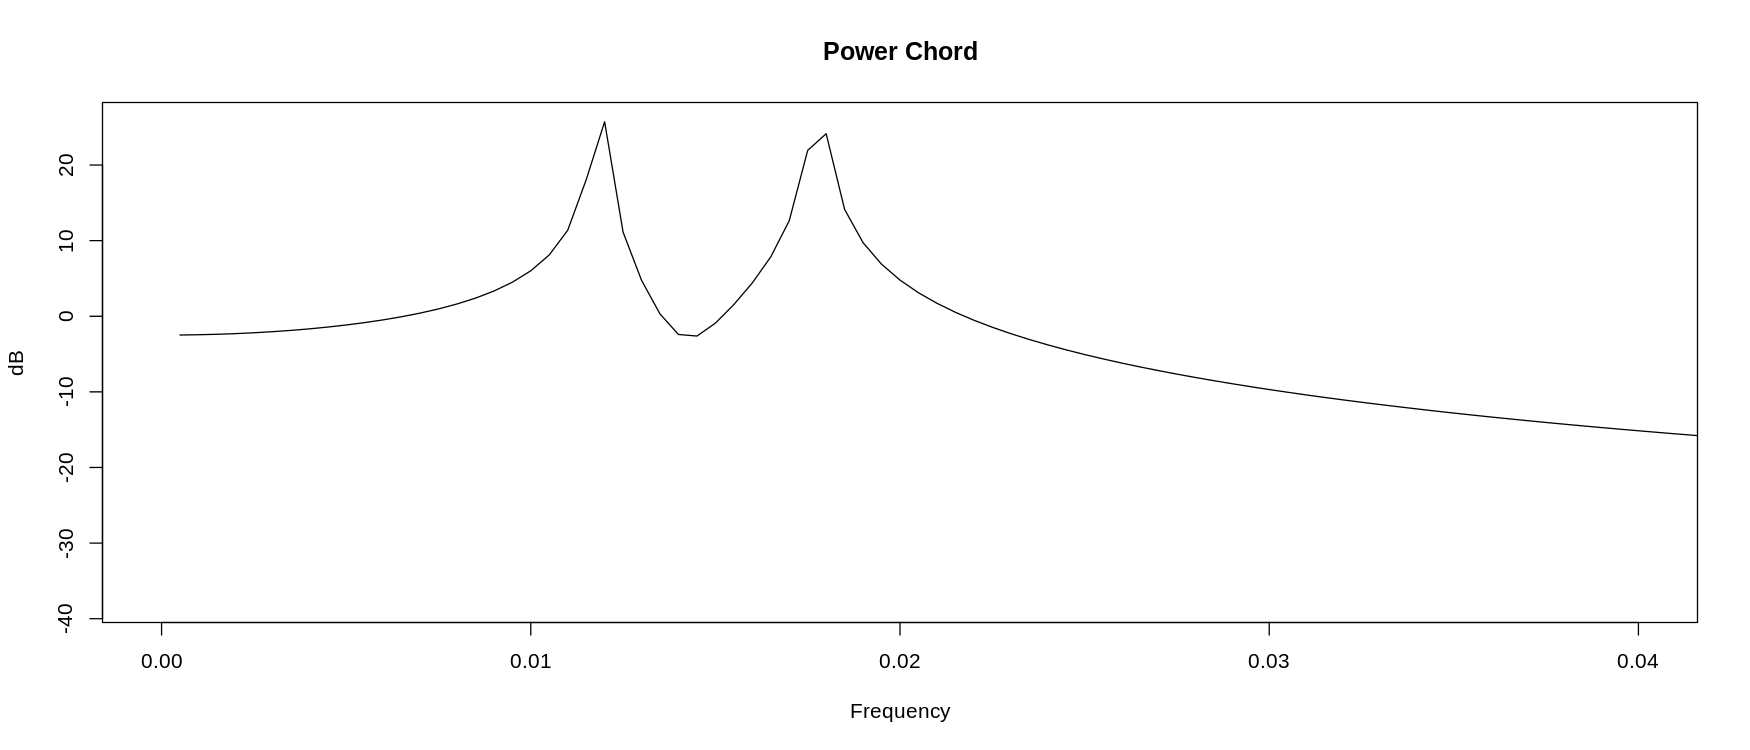

In [ ]:
plot(plot1$freq, plot1$db, type = 'l', xlim = c(0, 0.04), xlab = "Frequency", ylab = "dB", main = "Power Chord")

###Major Chord

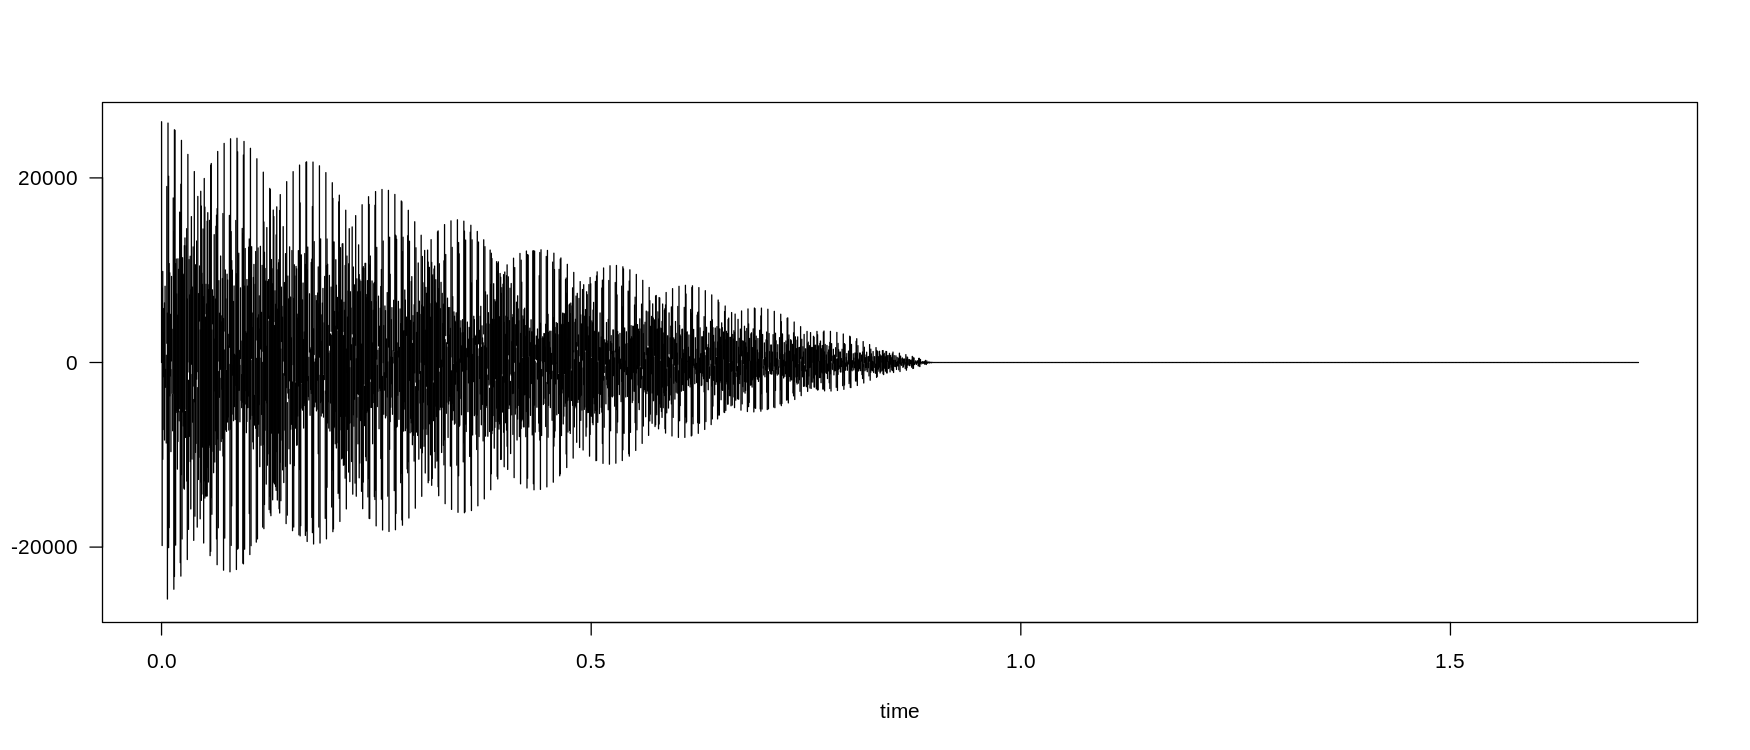

In [ ]:
#Plot Wave
plot(c_major)

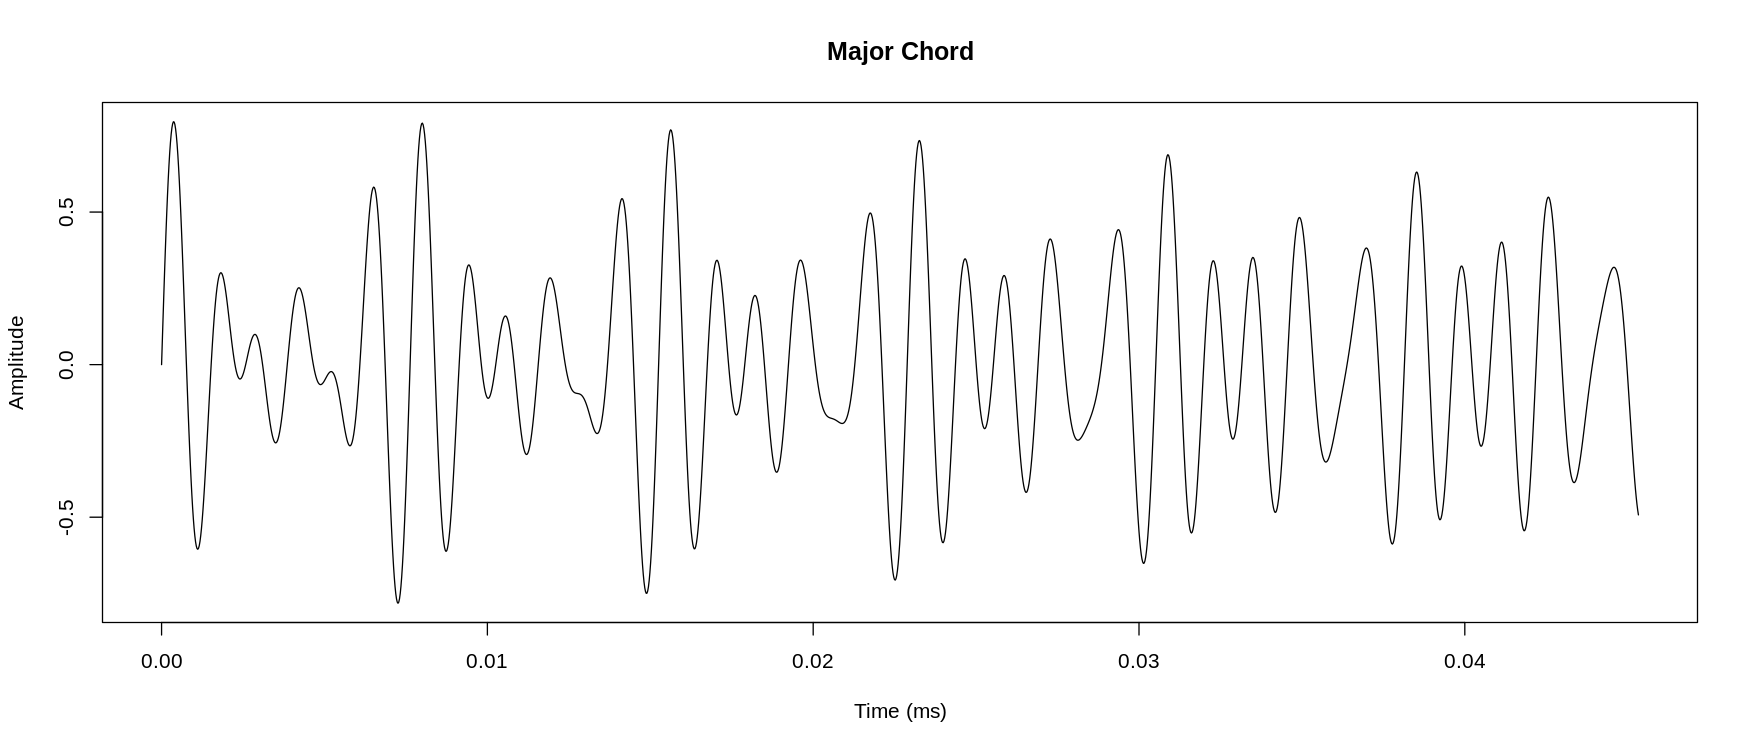

In [ ]:
#Normalize Amplitudes
c_major_time <- (0:(length(c_major@left) - 1)) / c_major@samp.rate
c_major_adjusted <- c_major@left / 2^(c_major@bit - 1)

#Extract clip
c_major_snippet_time <- c_major_time[1:2000]
c_major_snippet <- c_major_adjusted[1:2000]

plot(c_major_snippet_time, c_major_snippet, type = 'l', col='black', xlab='Time (ms)', ylab='Amplitude', main = "Major Chord")

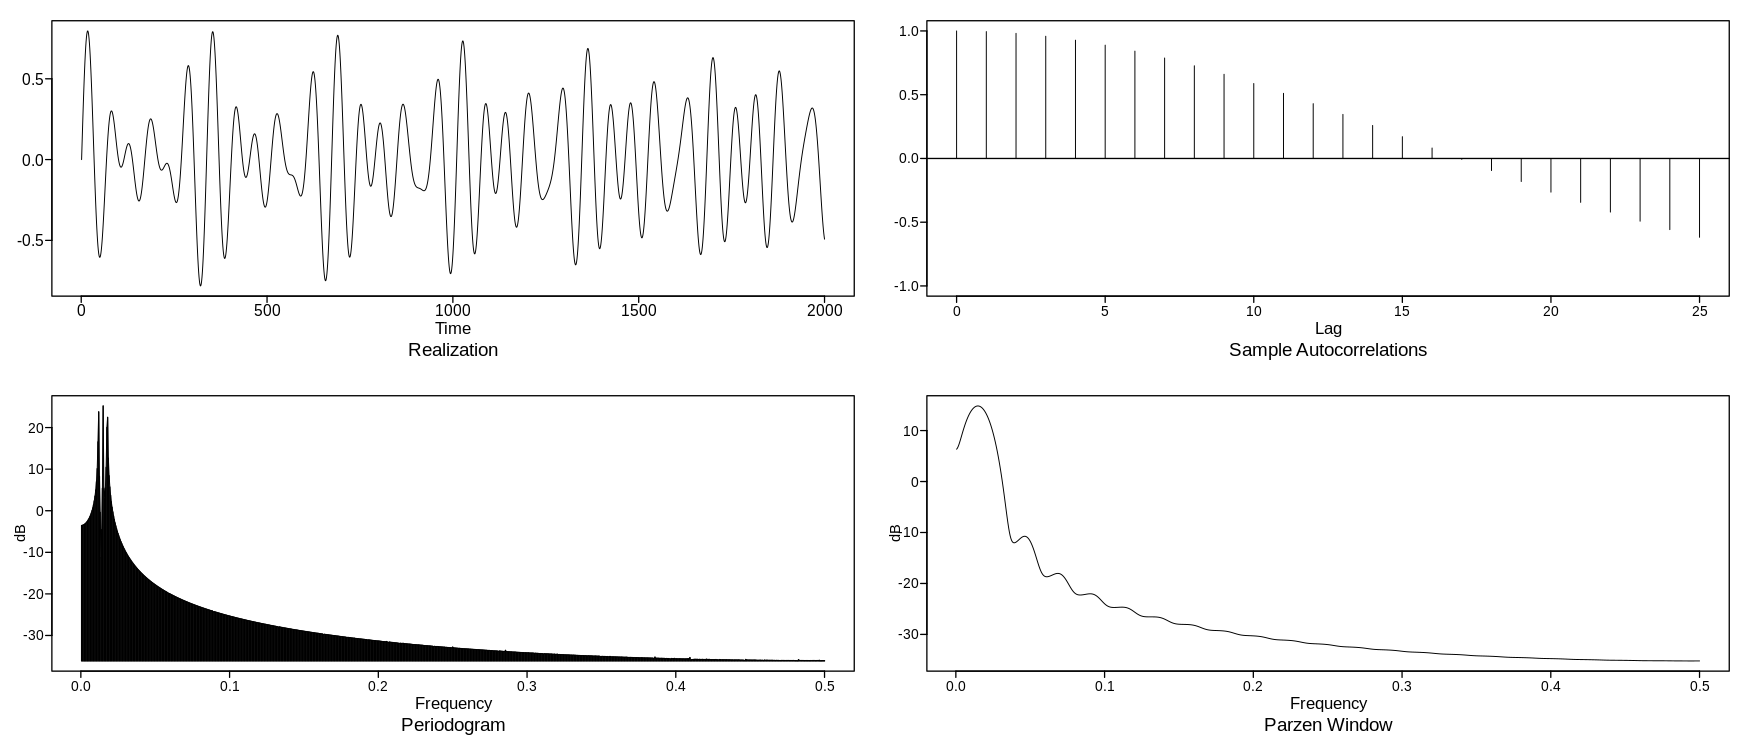

In [ ]:
plot2 <- plotts.sample.wge(c_major_snippet)

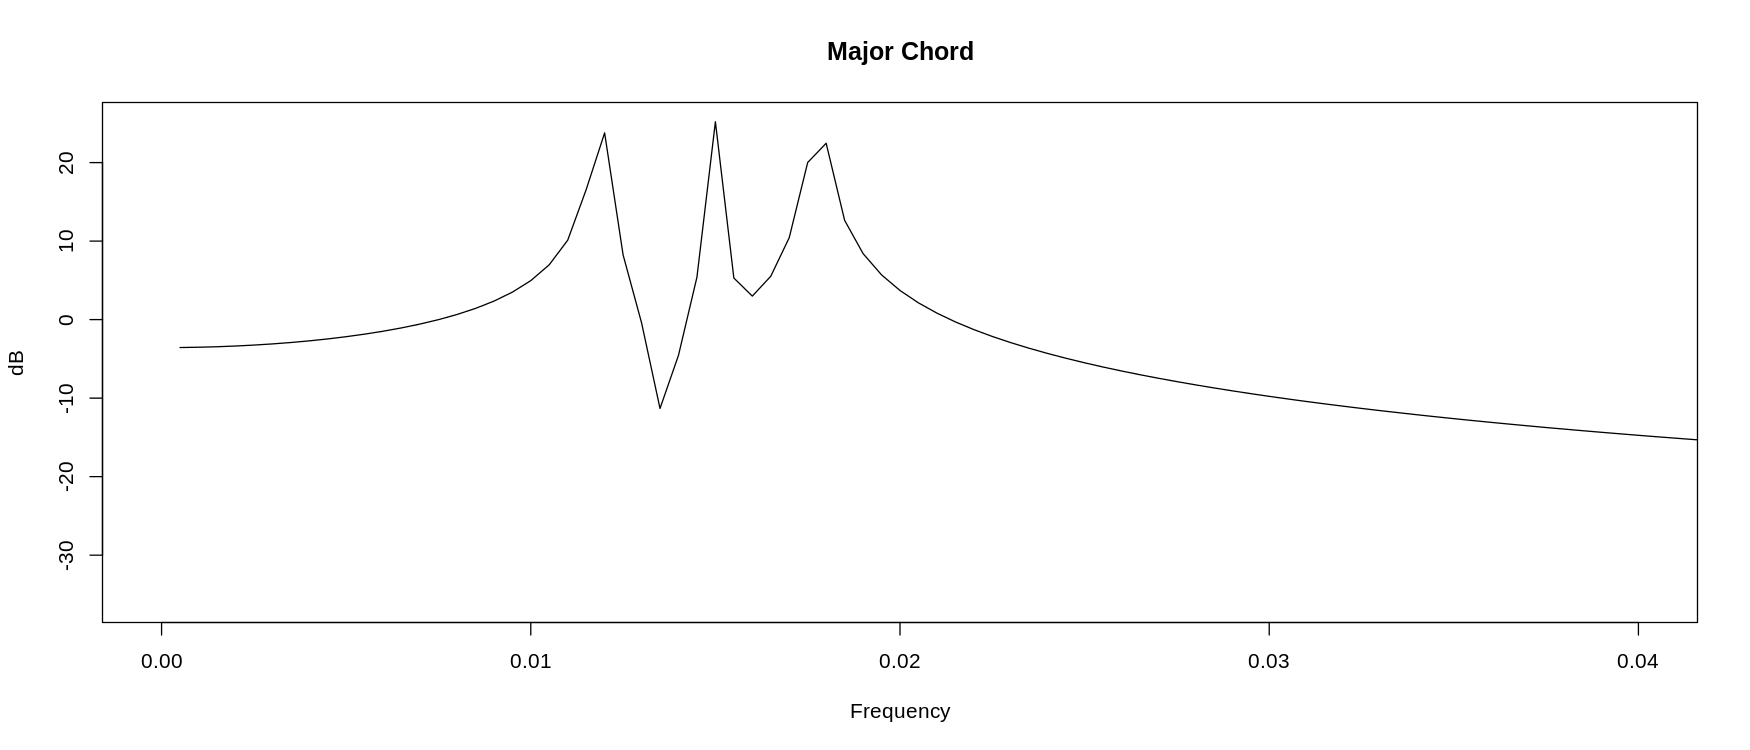

In [ ]:
plot(plot2$freq, plot2$db, type = 'l', xlim = c(0, 0.04), xlab = "Frequency", ylab = "dB", main = "Major Chord")

###Minor Chord

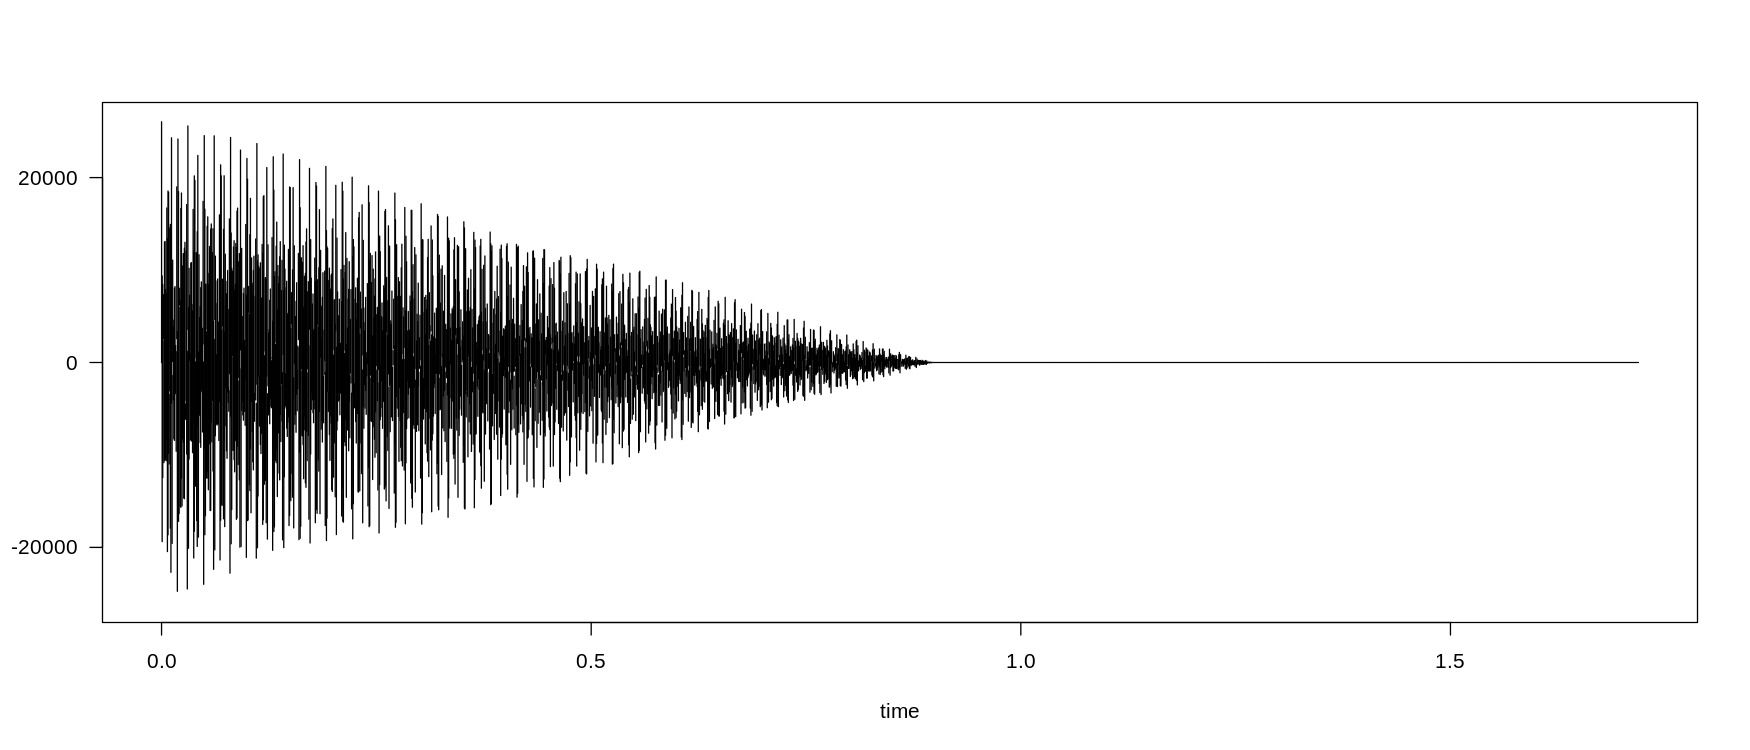

In [ ]:
#Plot Wave
plot(c_minor)

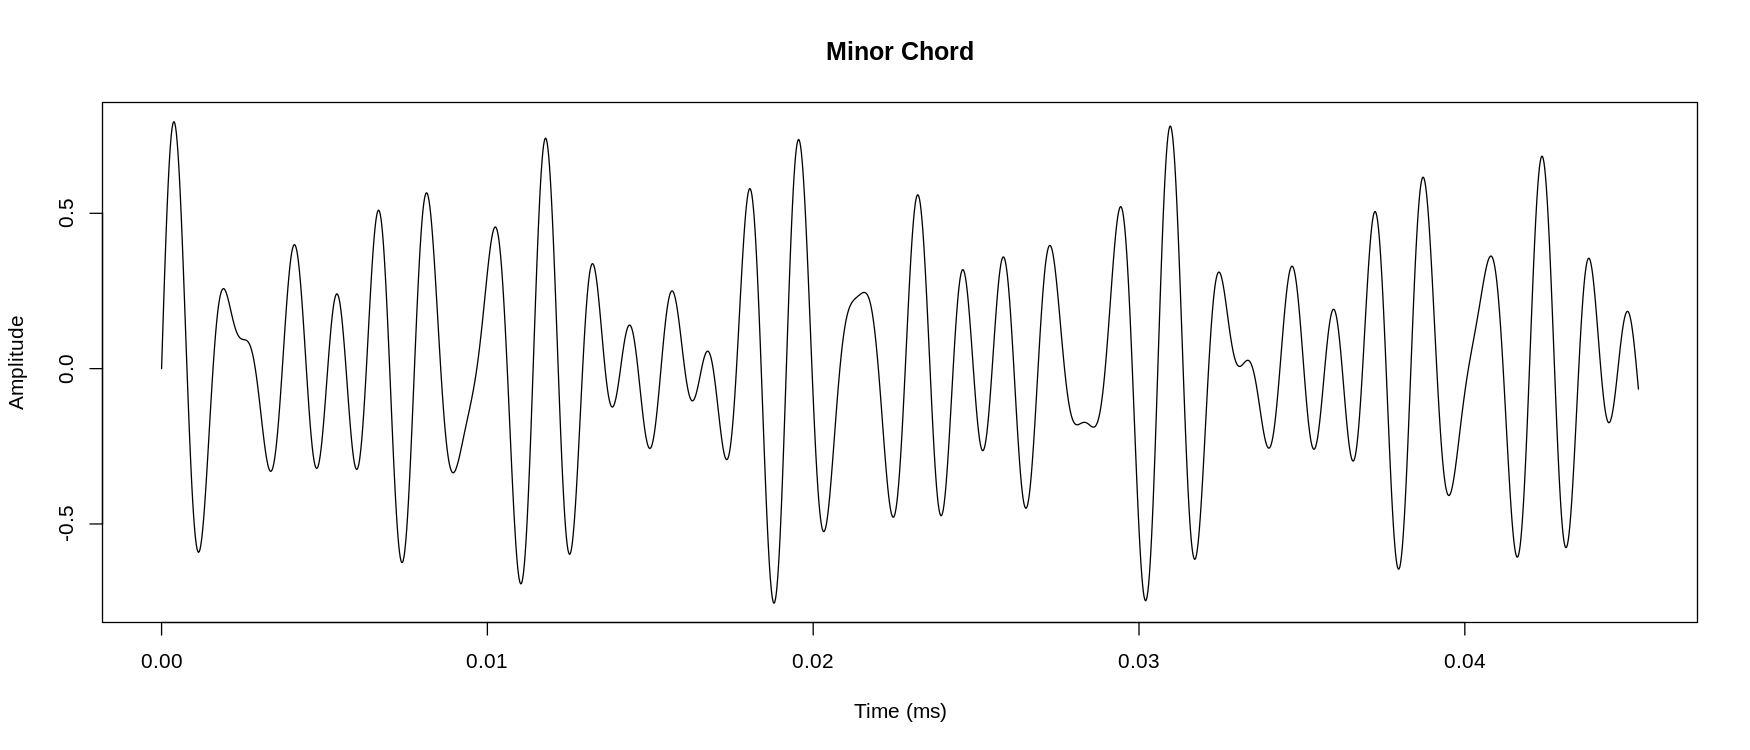

In [ ]:
#Normalize Amplitudes
c_minor_time <- (0:(length(c_minor@left) - 1)) / c_minor@samp.rate
c_minor_adjusted <- c_minor@left / 2^(c_minor@bit - 1)

#Extract clip
c_minor_snippet_time <- c_minor_time[1:2000]
c_minor_snippet <- c_minor_adjusted[1:2000]

plot(c_minor_snippet_time, c_minor_snippet, type = 'l', col='black', xlab='Time (ms)', ylab='Amplitude', main = "Minor Chord")

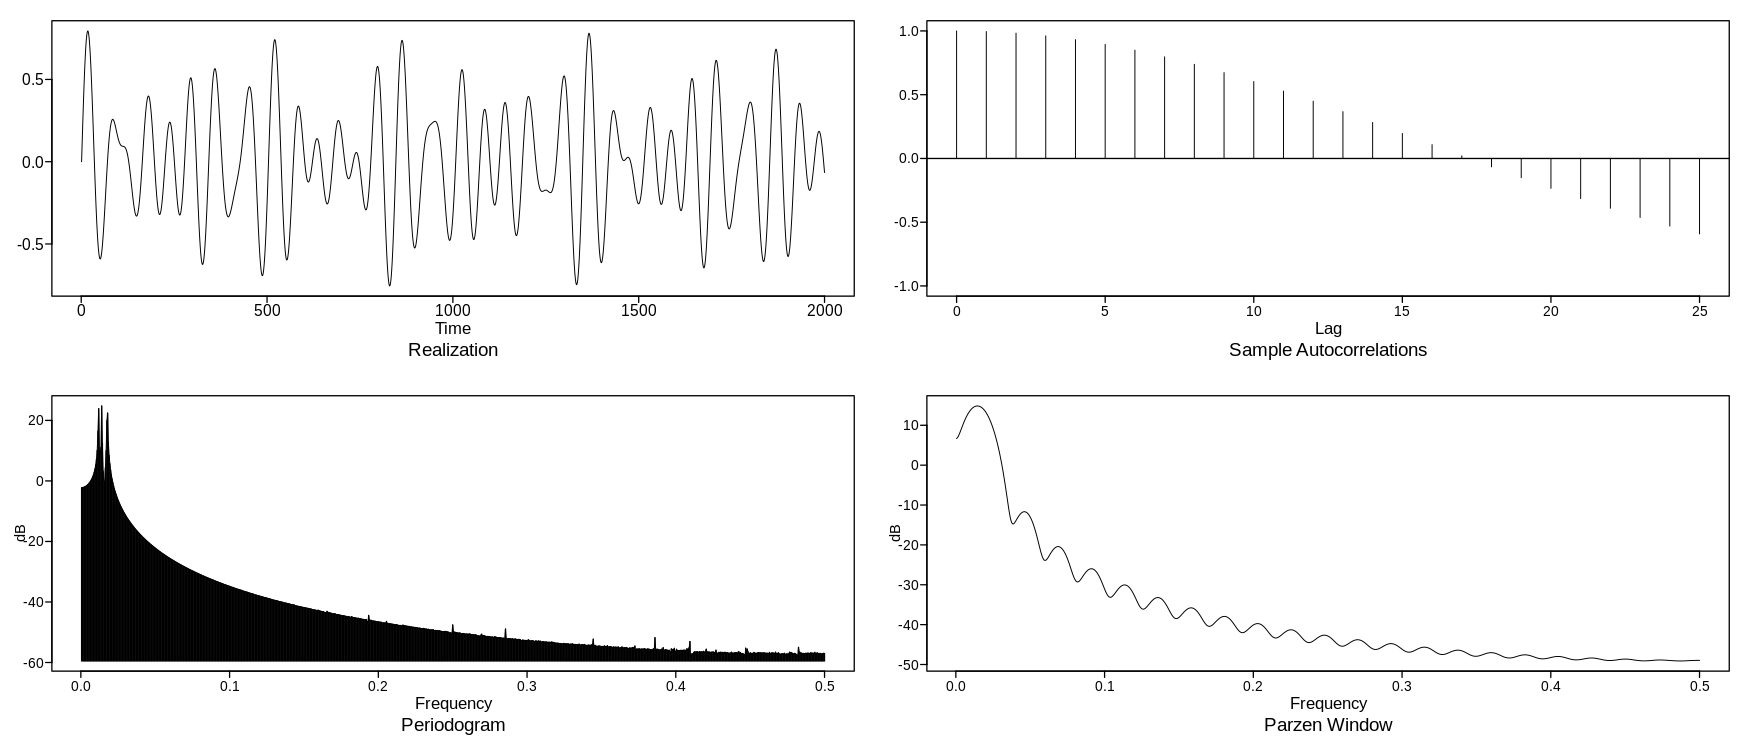

In [ ]:
plot3 <- plotts.sample.wge(c_minor_snippet)

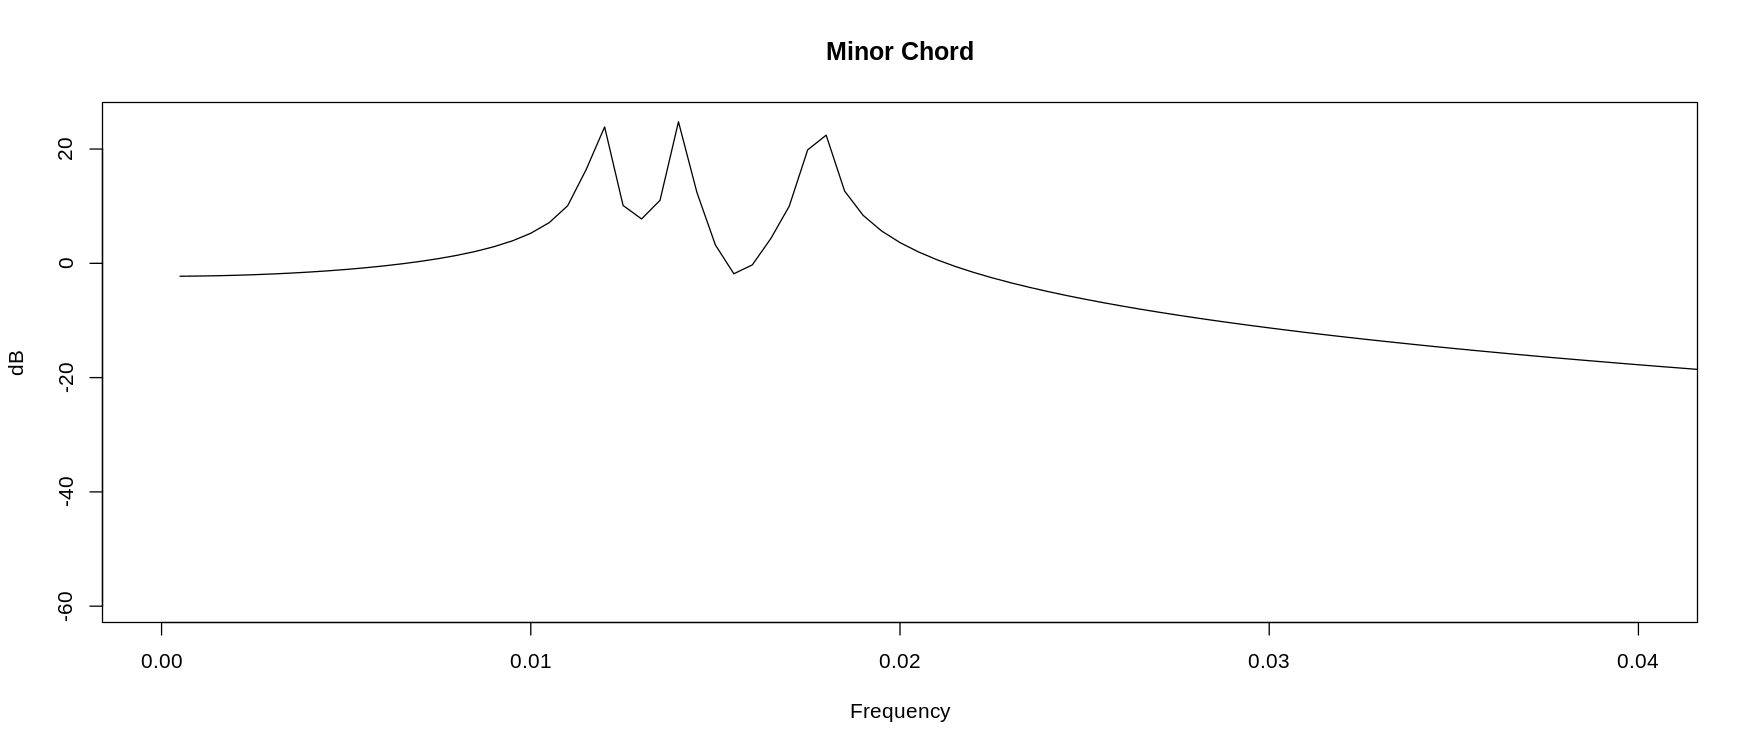

In [ ]:
plot(plot3$freq, plot3$db, type = 'l', xlim = c(0, 0.04), xlab = "Frequency", ylab = "dB", main = "Minor Chord")

###Comparison

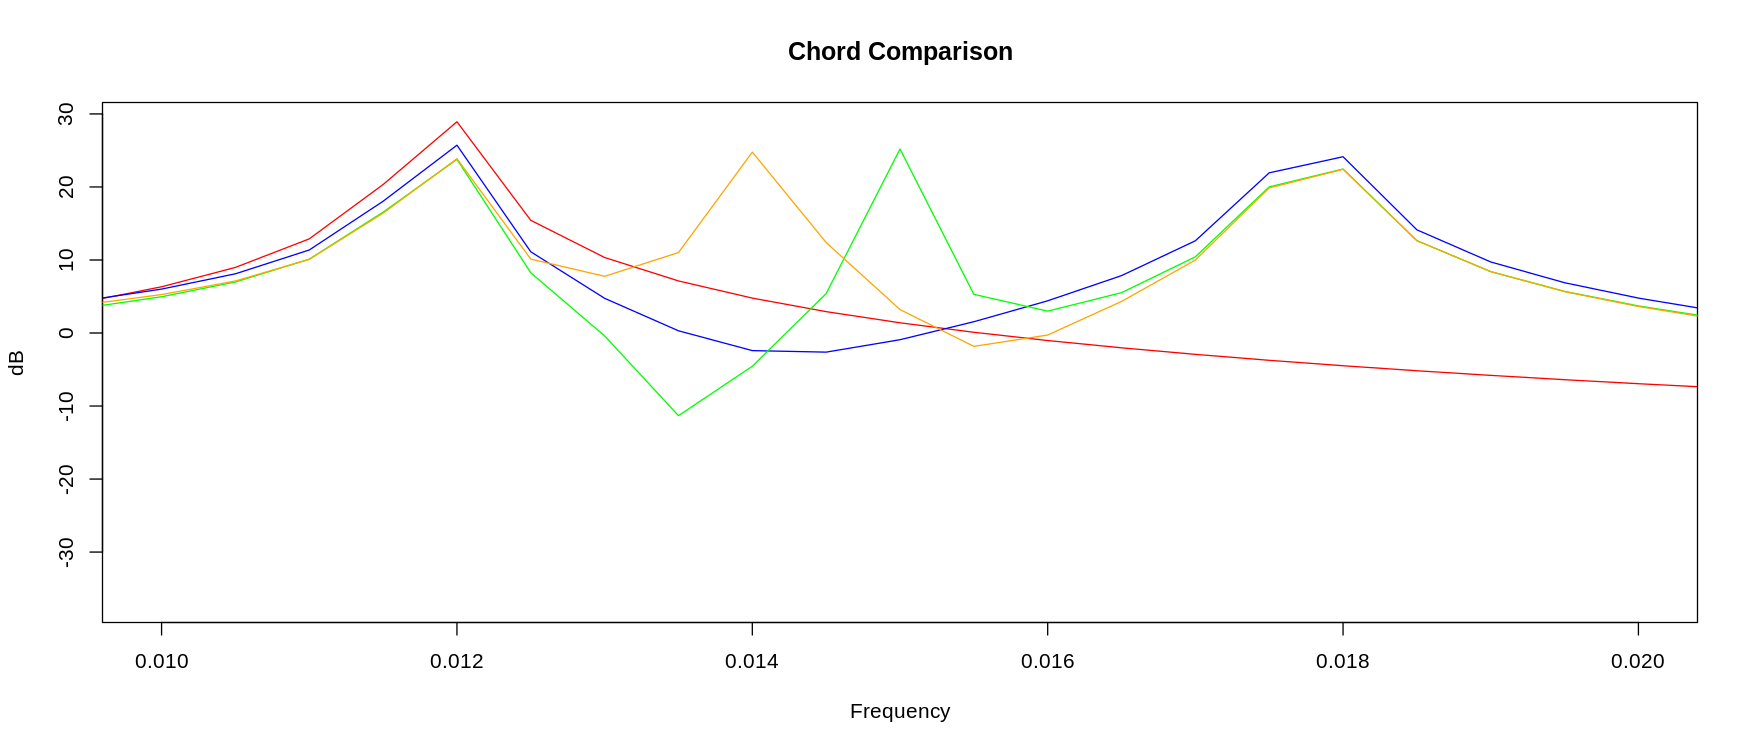

In [ ]:
plot(plot$freq, plot$db, type = 'l', xlim = c(0.01, 0.02), xlab = "Frequency", ylab = "dB", main = "Chord Comparison", col = "red")
lines(plot1$freq, plot1$db, type = 'l', col = 'blue')
lines(plot2$freq, plot2$db, type = 'l', col = 'green')
lines(plot3$freq, plot3$db, type = 'l', col = 'orange')

By overlaying the frequency compositions of our different chords, we can easily compare and contrast. The only difference between our major and minor chord is that the second note is played at a slightly lower frequency in the minor chord.

##Applying Filters

We will now explore how different filters can be used to effect the frequency composition of a chord.

###Band Stop Filters

By applying a band stop filter on the frequency ranges containing the second notes of the major and minor chords we can essentially transform them into power chords. We will try this with the C major and C minor chord and compare our results to the real power chord.

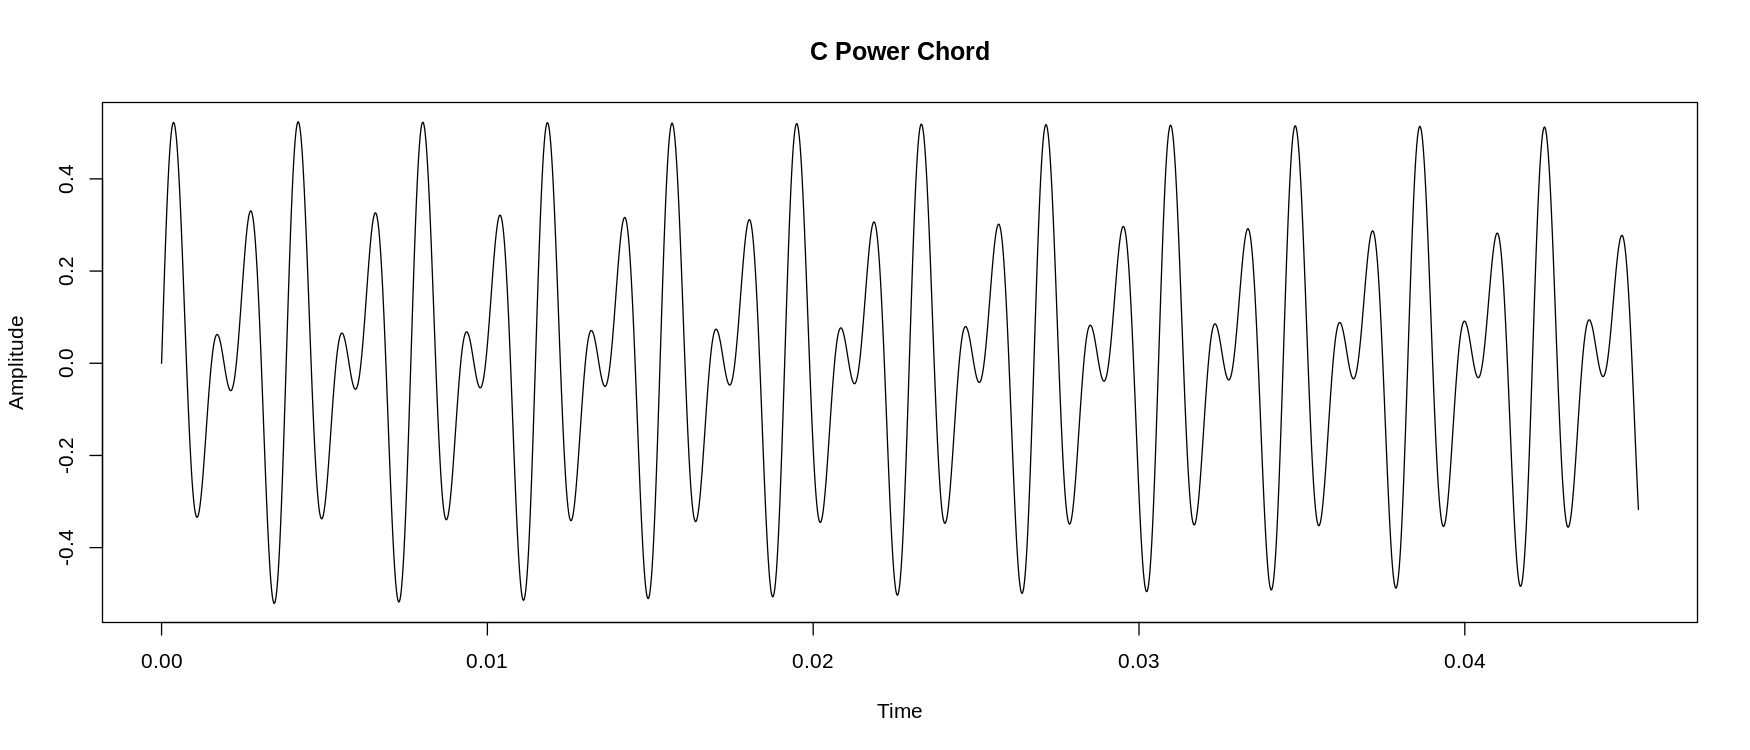

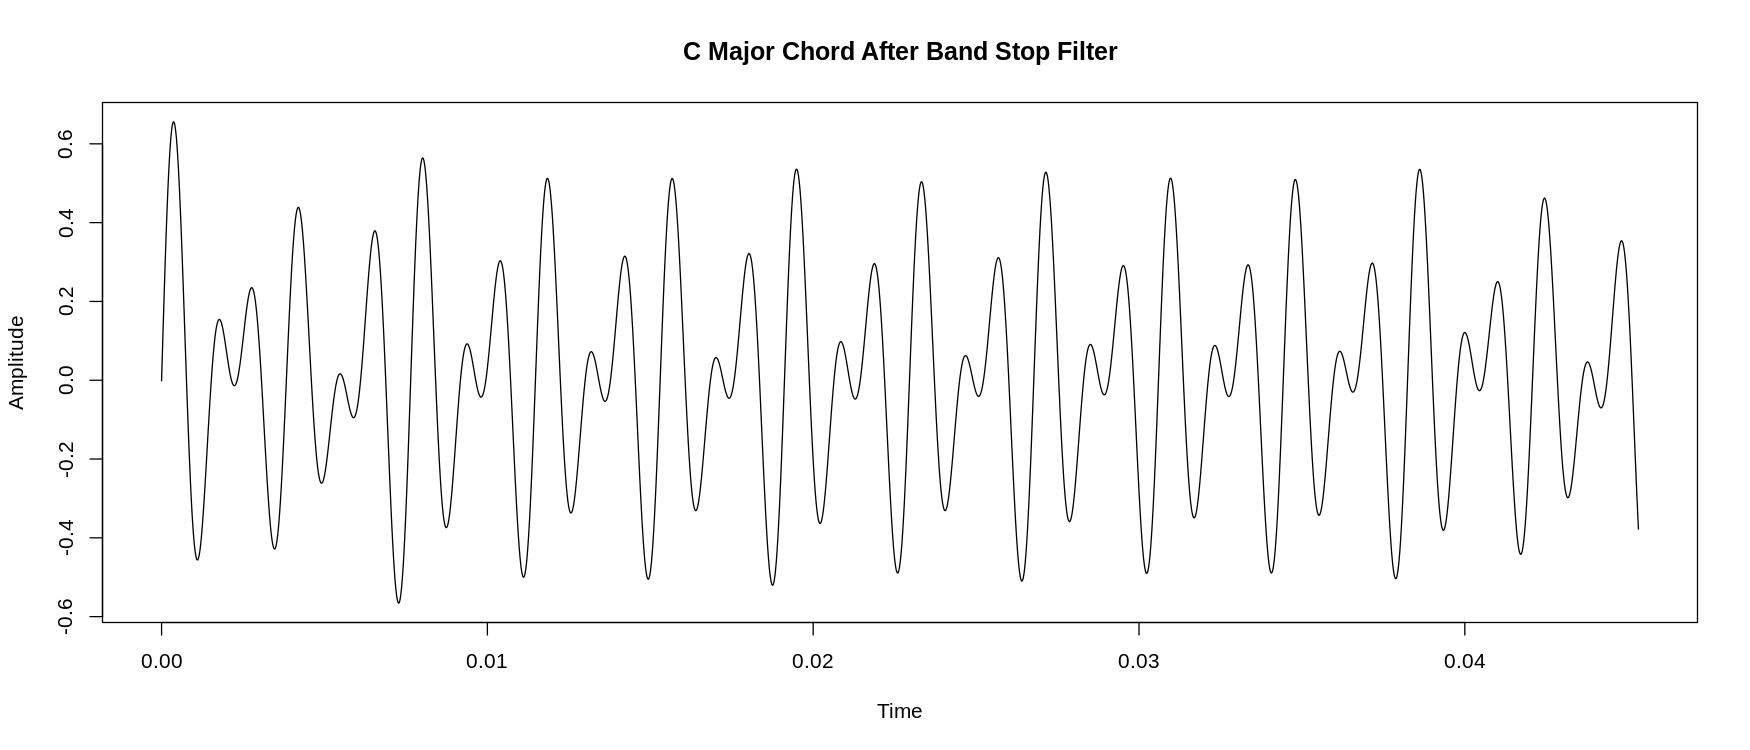

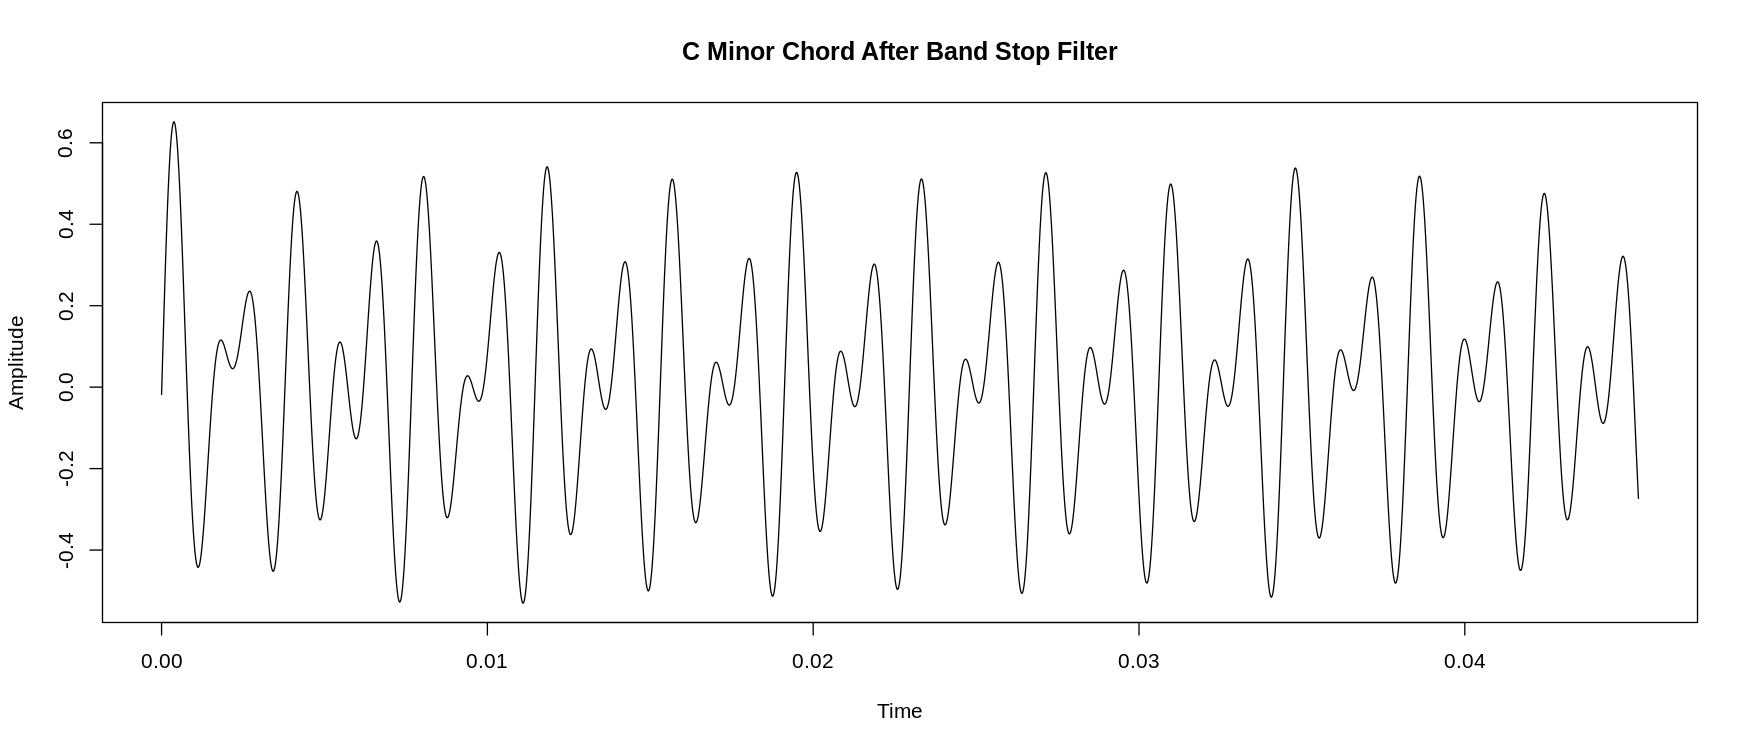

In [ ]:
#Filter Major Chord
bandstop_major <- butterworth.wge(c_major_snippet, type = "stop", cutoff = c(0.0145, 0.0155), plot = FALSE)

#Filter Minor Chord
bandstop_minor <- butterworth.wge(c_minor_snippet, type = "stop", cutoff = c(0.0135, 0.0145), plot = FALSE)

#Plot filtered Chords
plot(c_power_snippet_time, c_power_snippet, type = 'l', ylab = "Amplitude", main = "C Power Chord", xlab = "Time")
plot(c_major_snippet_time, bandstop_major$x.filt, type = 'l', ylab = "Amplitude", main = "C Major Chord After Band Stop Filter", xlab = "Time")
plot(c_minor_snippet_time, bandstop_minor$x.filt, type = 'l', ylab = "Amplitude", main = "C Minor Chord After Band Stop Filter", xlab = "Time")

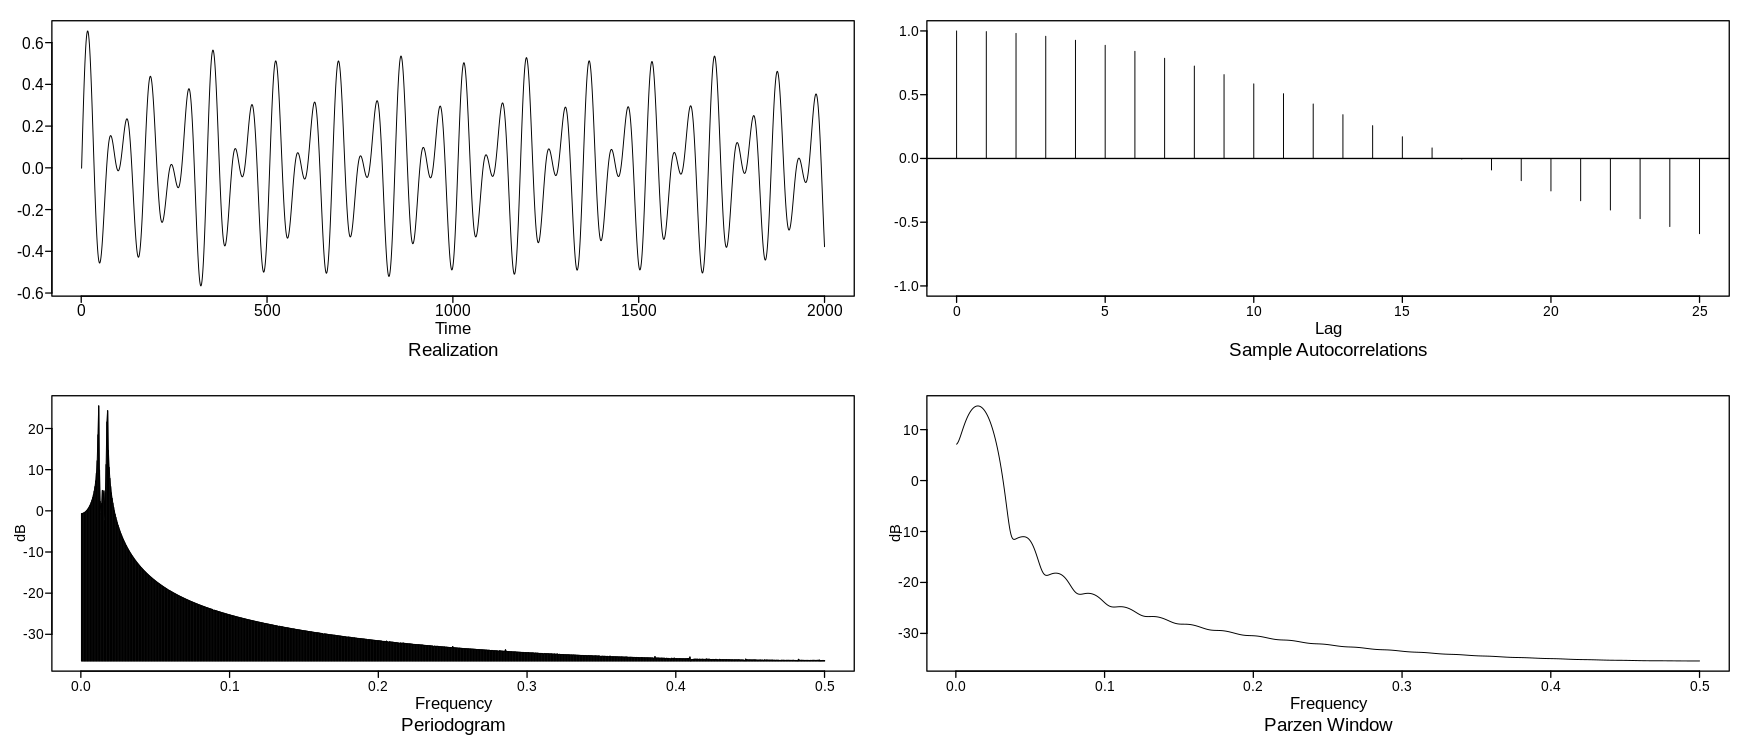

In [ ]:
#Get Periodogram for filtered major chord
plot4 <- plotts.sample.wge(bandstop_major$x.filt)

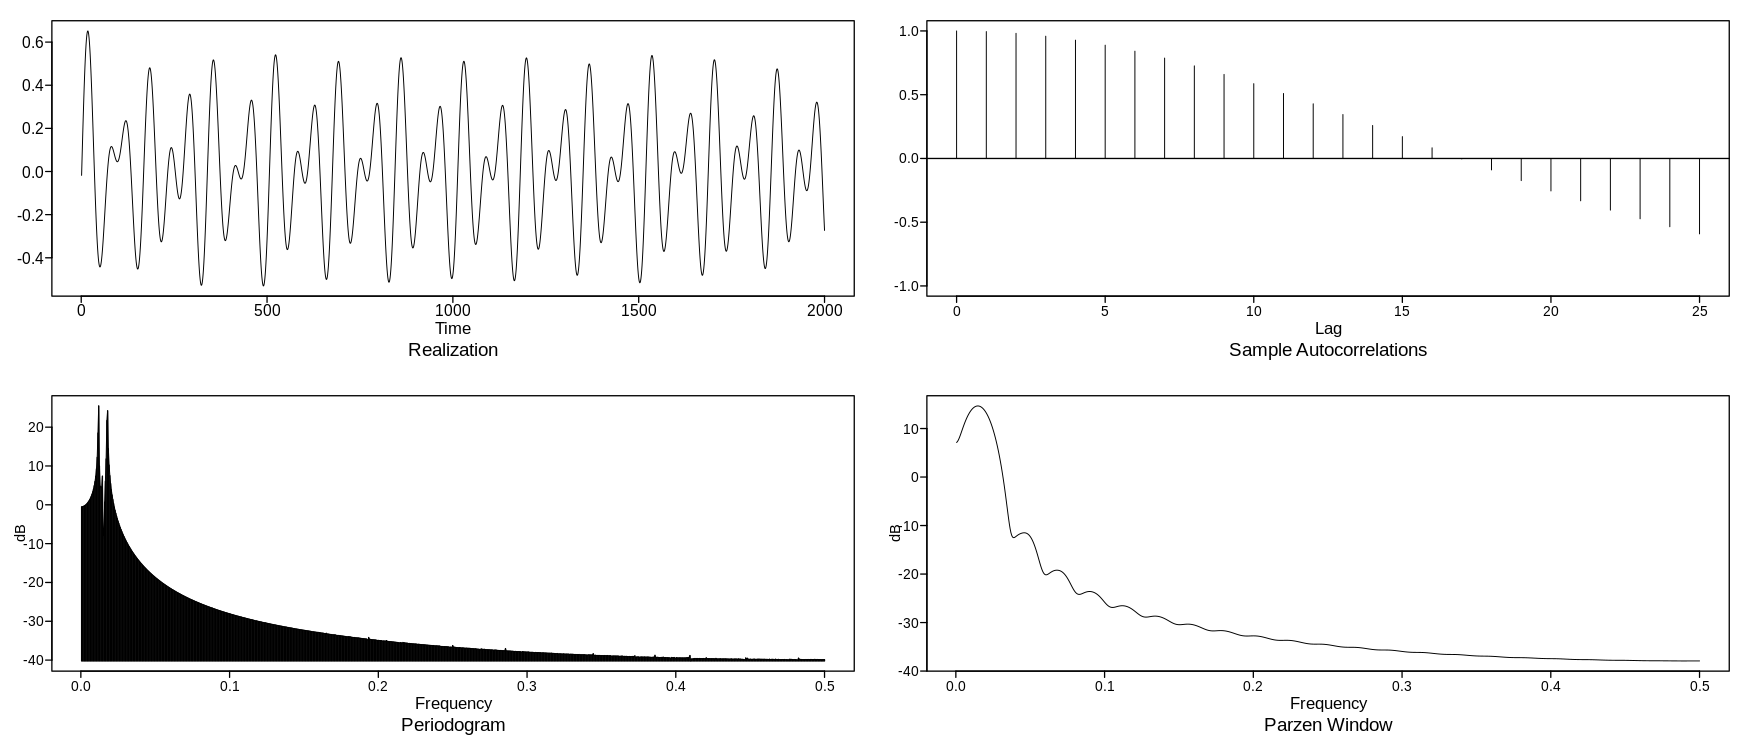

In [ ]:
#Get Periodogram for filtered minor chord
plot5 <- plotts.sample.wge(bandstop_minor$x.filt)

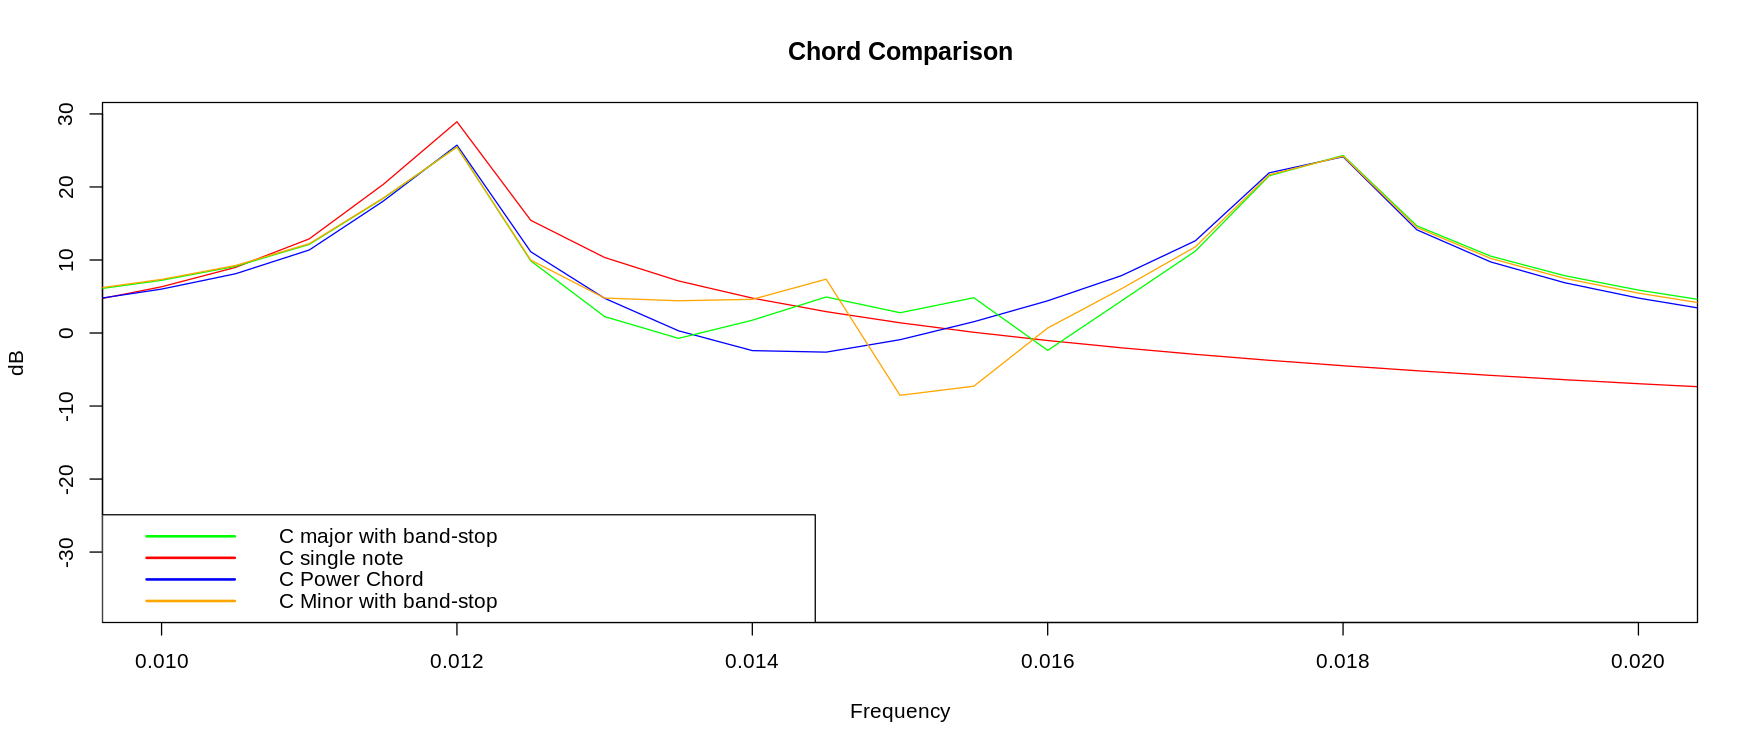

In [ ]:
#
plot(plot$freq, plot$db, type = 'l', xlim = c(0.01, 0.02), xlab = "Frequency", ylab = "dB", main = "Chord Comparison", col = "red")
lines(plot1$freq, plot1$db, type = 'l', col = 'blue')
lines(plot4$freq, plot4$db, type = 'l', col = 'green')
lines(plot5$freq, plot5$db, type = 'l', col = 'orange')
legend(x = "bottomleft",
       legend = c("C major with band-stop", "C single note", "C Power Chord", "C Minor with band-stop"),
       col = c("green", "red", "blue","orange"),
       lwd = 2,
       lty = c(1, 1, 1, 1)) 

We can see from the periodogram that after applying band-stop filters to our major and minor chords, they have essentially become power chords.

###Band Pass Filters

Now that we have used band-stop filters to convert Major and Minor chords to power chords we will attempt to use band-pass filters to isolate the individual notes in a chord.

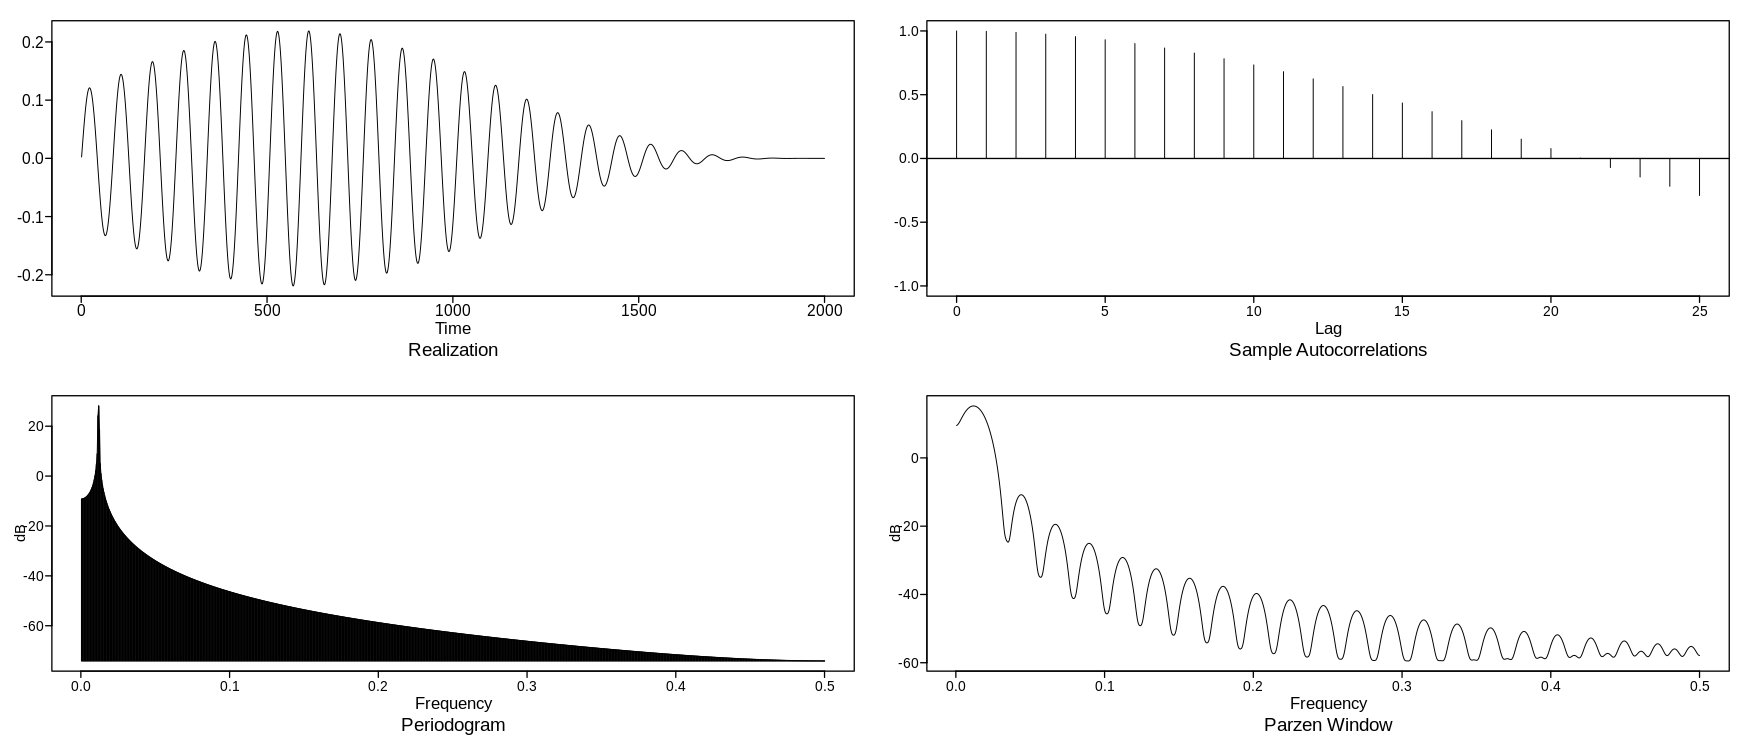

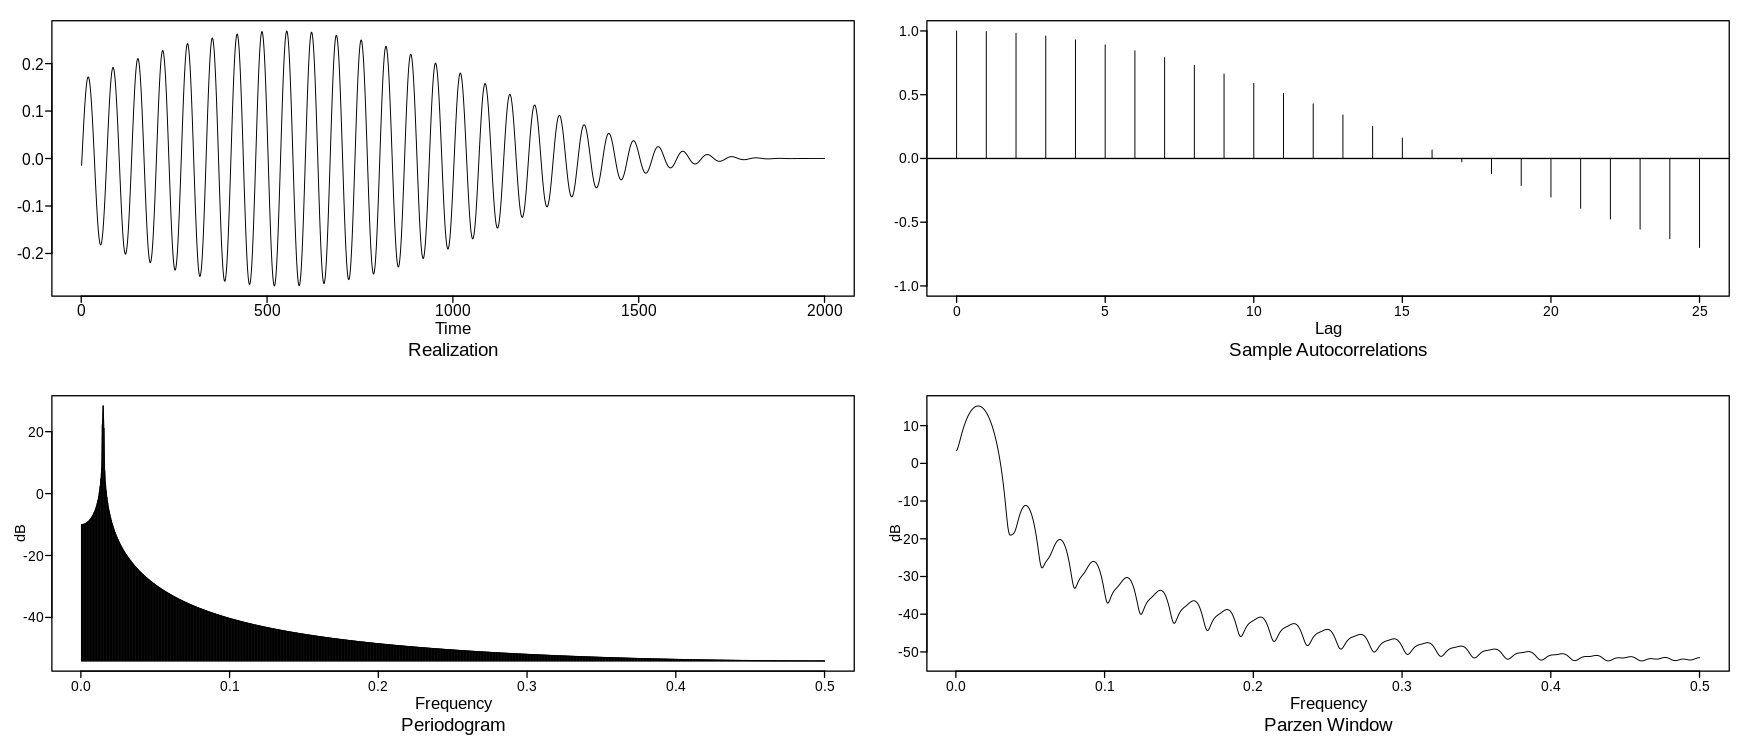

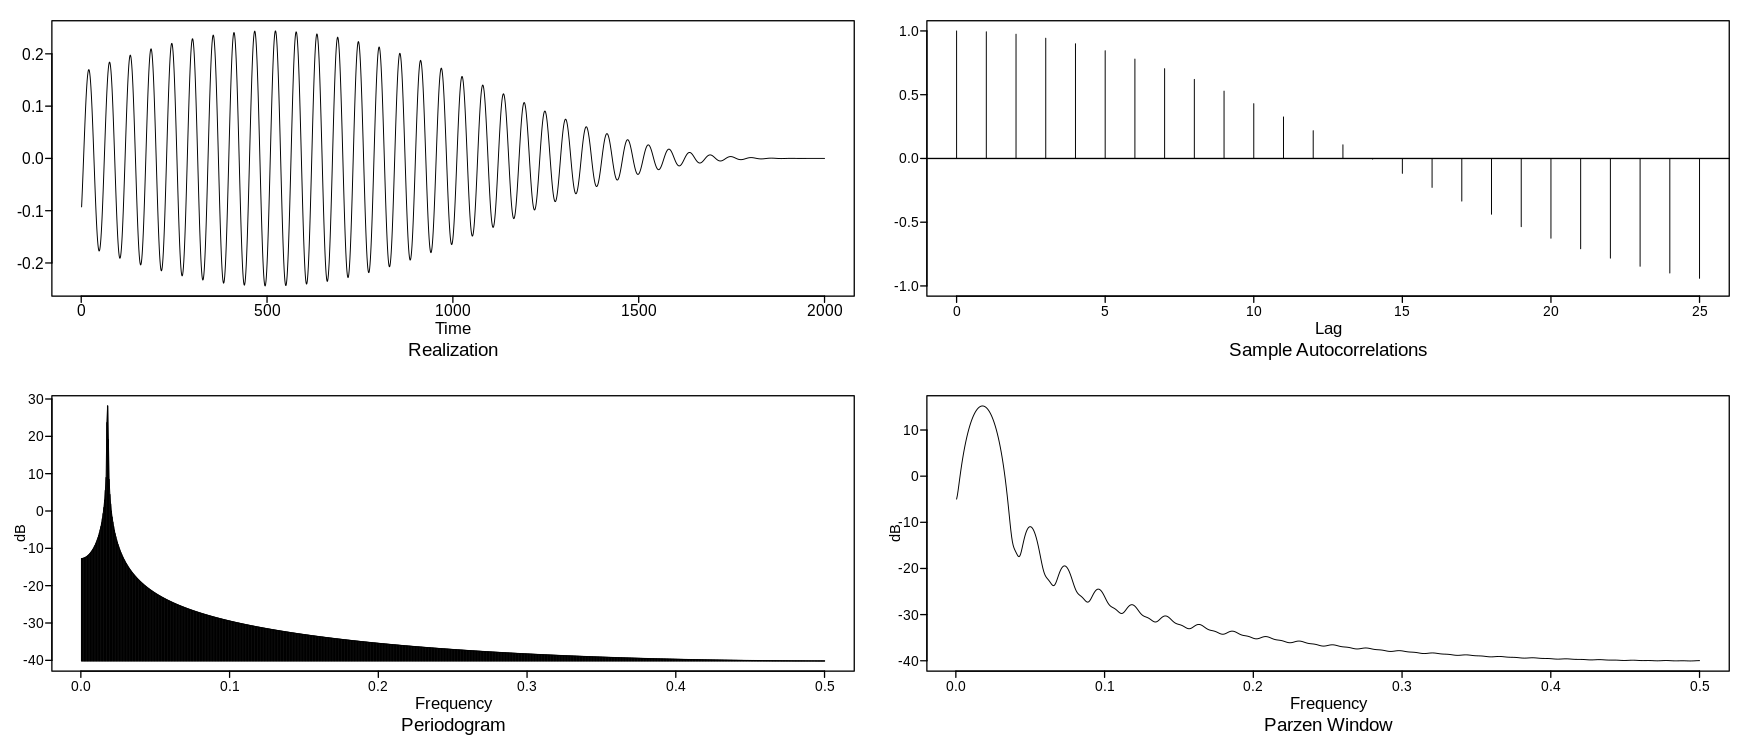

In [ ]:
#Extract C Note
bandpass_major_c <- butterworth.wge(c_major_snippet, type = "pass", cutoff = c(0.0115, 0.0125), plot = FALSE)

#Extract E Note
bandpass_major_e <- butterworth.wge(c_major_snippet, type = "pass", cutoff = c(0.0145, 0.0155), plot = FALSE)

#Extract G Note
bandpass_major_g <- butterworth.wge(c_major_snippet, type = "pass", cutoff = c(0.0175, 0.0185), plot = FALSE)

plot6 <- plotts.sample.wge(bandpass_major_c$x.filt)
plot7 <- plotts.sample.wge(bandpass_major_e$x.filt)
plot8 <- plotts.sample.wge(bandpass_major_g$x.filt)

Looking at the plots above, we can see that the filtered chord has been broken down into 3 seperate series each having distinct dominant frequencies.

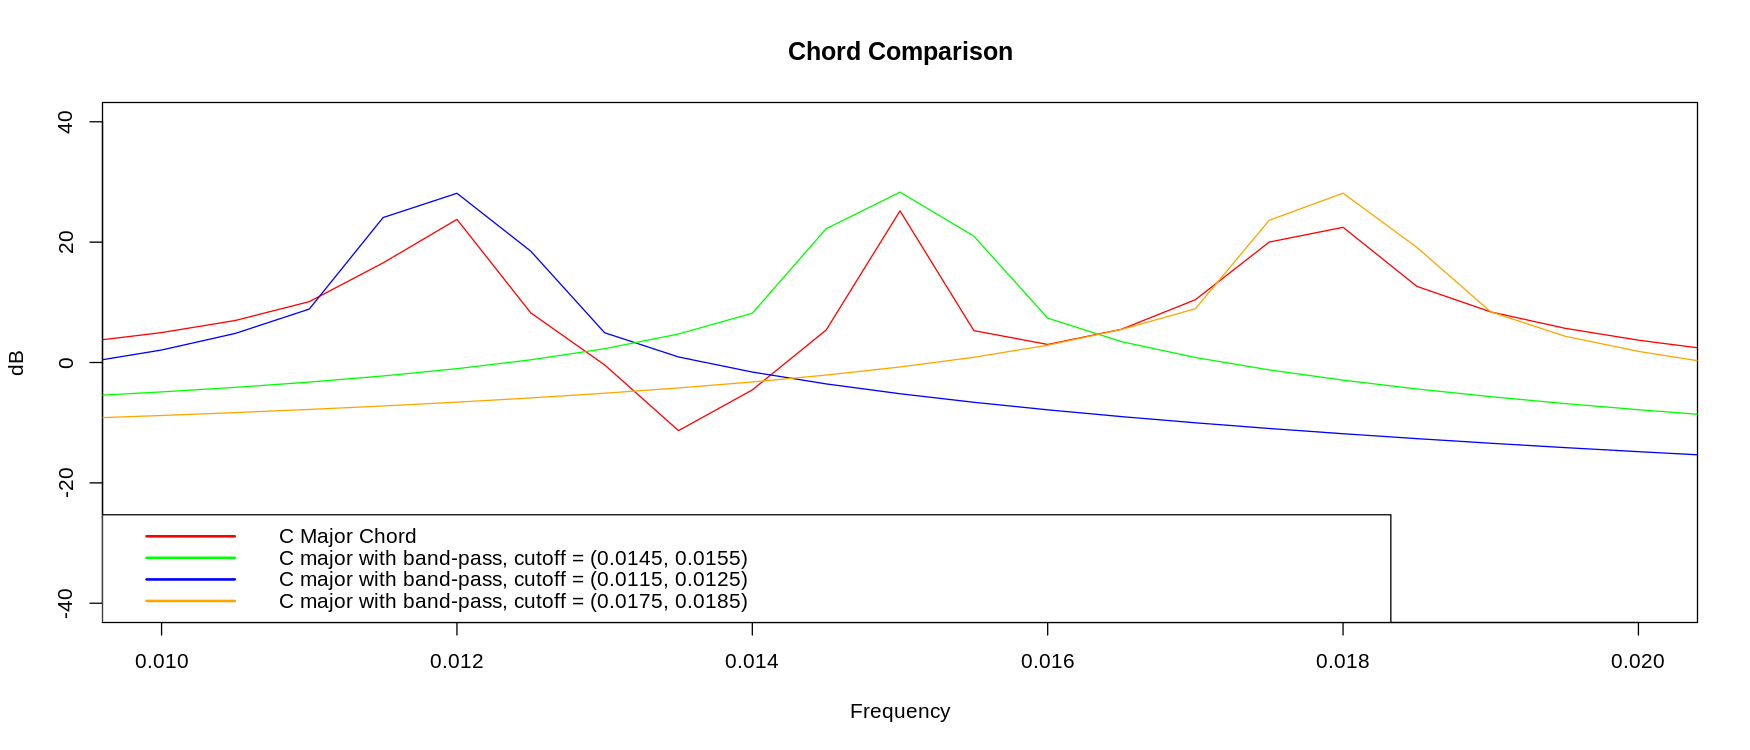

In [ ]:
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(plot2$freq, plot2$db, type = 'l', xlim = c(0.01, 0.02), ylim = c(-40, 40), xlab = "Frequency", ylab = "dB", main = "Chord Frequency Comparison", col = "red")
lines(plot6$freq, plot6$db, type = 'l', col = 'blue')
lines(plot7$freq, plot7$db, type = 'l', col = 'green')
lines(plot8$freq, plot8$db, type = 'l', col = 'orange')
legend(x = "bottomleft",
       legend = c( "C Major Chord", "C major with band-pass, cutoff = (0.0145, 0.0155)","C major with band-pass, cutoff = (0.0115, 0.0125)", "C major with band-pass, cutoff = (0.0175, 0.0185)"),
       col = c("red", "green", "blue","orange"),
       lwd = 2,
       lty = c(1, 1, 1, 1)) 

Using band-pass filters we have effectively isolated the individual notes comprising the chord.

##Discussion and Conclusion

This project examined 3 very basic chord types, the C Power Chord, the C Major Chord, and the C Minor Chord. Each chord has its own unique composition of notes, and each chord types elicits its own unique emotional response. The most basic chord, the power chord, involving just 2 notes, is used extensively in Rock Music and its emotional response is typiccaly dependent on the context it is used. Major Chords and Minor chords however, elicit far more distinct emotional responses. Major Chords are generally associated with a happy feeling, whereas minor chords are generally associated with a sad feeling. Given that the major and minor chords are the same apart from a single note (E/D#), we must attribute the difference in emotional response to the difference between those two notes. This also helps to explain why the power chord, which does not contain E or D#, is somewhat emotionally ambiguous.

After analyzing the frequency composition of the different chord types, I experimented with different filters and their effects on the chords. By using a band-stop filter, we were able to remove the middle note from Major and Minor chords, effectively making them power chords. By using a band-pass filter, we were able to isolate the individual notes in a chord. 

In the future further analysis could be done on more complicated chord structures.

##References

* Harmony - Music Theory Academy - Learn about harmony in music. (2021). Retrieved 15 May 2021, from https://www.musictheoryacademy.com/category/understanding-music/harmony/

*   Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge

*   Uwe Ligges (2018). tuneR: Analysis of Music and Speech. R package version 1.3.3 https://cran.r-project.org/web/packages/tuneR/index.html

*   Davis, T. (2021). Applied Time Series Analysis: Course Notebook - Student Copy Lesson 3 [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1qIdpd_8WFct9zBZ5uwO_Bcg-F3svu0KJ?usp=sharing.tem
